In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Loading the dataset with latin-1 encoding
hdi_df = pd.read_csv('Human_Development_Index_Dataset.csv', encoding='latin-1')

# Identifying unique years in the dataset
unique_years = hdi_df['year'].unique()
print("Unique years:", sorted(unique_years))

# Filtering the dataset to include only observations from the year 2022
hdi_2022_df = hdi_df[hdi_df['year'] == 2022]

# Verifying the filtered dataframe is saved
print(f"\nNumber of observations in 2022: {len(hdi_2022_df)}")
print("\nhdi_2022_df is ready for subsequent tasks in Problem 1A")

Unique years: [np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]

Number of observations in 2022: 206

hdi_2022_df is ready for subsequent tasks in Problem 1A


In [ ]:
# Task 2: Data Exploration

# Display the first 10 rows of the 2022 dataset
print("First 10 rows of the 2022 dataset:")
print(hdi_2022_df.head(10))

First 10 rows of the 2022 dataset:
     Unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              Andorra  2022  0.884           83.552   
164         165  AGO               Angola  2022  0.591           61.929   
197         198  ATG  Antigua and Barbuda  2022  0.826           79.236   
230         231  ARG            Argentina  2022  0.849           76.064   
263         264  ARM              Armenia  2022  0.786           73.372   
296         297  AUS            Australia  2022  0.946           83.579   
329         330  AUT              Austria  2022  0.926           82.412   

     pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
32      41.128771  0.332443  0.534145        66.213  ...   

In [ ]:
# Count the number of rows and columns
num_rows = hdi_2022_df.shape[0]
num_cols = hdi_2022_df.shape[1]
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_cols}")


Number of rows: 206
Number of columns: 30


In [ ]:
# List all column names and their data types
print("\nColumn names and data types:")
print(hdi_2022_df.dtypes)


Column names and data types:
Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_parliament_f_%      float64
seats_in_parliament_m_%      float64
labour_p

In [ ]:
# Task 3: Missing Values & Data Cleaning

# Check for missing values in each column and report total counts
print("Missing values in each column:")
print(hdi_2022_df.isnull().sum())
print(f"\nTotal missing values: {hdi_2022_df.isnull().sum().sum()}")

# Inspect dataset for:
# - numeric columns stored as text
print("\nData types:")
print(hdi_2022_df.dtypes)

# - inconsistent or misspelled country names
print(f"\nUnique countries: {hdi_2022_df['country'].nunique()}")
print(hdi_2022_df['country'].unique())

# - duplicate rows
print(f"\nDuplicate rows: {hdi_2022_df.duplicated().sum()}")

# - special characters representing missing data
for col in hdi_2022_df.columns:
    if hdi_2022_df[col].dtype == 'object':
        special = hdi_2022_df[col].isin(['–', '..', 'NA', 'N/A', '']).sum()
        if special > 0:
            print(f"Special characters in {col}: {special}")

# Apply necessary cleaning steps
hdi_2022_clean = hdi_2022_df.copy()

# Convert data types where needed
hdi_2022_clean = hdi_2022_clean.replace(['–', '..', 'NA', 'N/A', ''], np.nan)
for col in hdi_2022_clean.columns:
    if hdi_2022_clean[col].dtype == 'object' and col not in ['country', 'region', 'iso3']:
        hdi_2022_clean[col] = pd.to_numeric(hdi_2022_clean[col], errors='coerce')

# Remove duplicates
hdi_2022_clean = hdi_2022_clean.drop_duplicates()

# Handle missing values (drop rows with missing HDI)
# Justification: HDI is the primary indicator, cannot be imputed
hdi_2022_clean = hdi_2022_clean.dropna(subset=['hdi'])

print(f"\nCleaned shape: {hdi_2022_clean.shape}")

hdi_2022_df = hdi_2022_clean

Missing values in each column:
Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           0
life_expectancy               0
pop_millions                  0
hdi_f                         0
hdi_m                         0
life_expec_f                  0
life_expec_m                  0
expec_yr_school               0
expec_yr_school_f             0
expec_yr_school_m             0
mean_yr_school                0
mean_yr_school_f              0
mean_yr_school_m              0
gross_inc_percap              0
gross_inc_percap_f            0
gross_inc_percap_m            0
gender_development            0
gender_inequality            16
secondary_education_f_%      10
secondary_education_m_%      10
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%      0
labour_participation_m_%      0
co2_emission_tons             1
mat_footprint_percap_tons    33
dtype: in

In [ ]:
# Task 4: Basic Statistics

# Compute the mean, median, and standard deviation of HDI for the year 2022
mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()

print(f"Mean: {mean_hdi}")
print(f"Median: {median_hdi}")
print(f"Standard Deviation: {std_hdi}")

# Identify the country with the highest HDI in 2022
highest_hdi = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()]
print(f"\nHighest HDI: {highest_hdi['country']} - {highest_hdi['hdi']}")

# Identify the country with the lowest HDI in 2022
lowest_hdi = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()]
print(f"Lowest HDI: {lowest_hdi['country']} - {lowest_hdi['hdi']}")

Mean: 0.7261191709844561
Median: 0.739
Standard Deviation: 0.15136301320327844

Highest HDI: Switzerland - 0.967
Lowest HDI: Somalia - 0.38


In [ ]:
# Task 5: Filtering and Sorting

# Filter countries with HDI greater than 0.800
filtered_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]

# Sort by Gross National Income per Capita in descending order
sorted_df = filtered_df.sort_values('gross_inc_percap', ascending=False)

# Display the top 10 countries
print("Top 10 countries with HDI > 0.800 sorted by GNI per Capita:")
print(sorted_df.head(10))

Top 10 countries with HDI > 0.800 sorted by GNI per Capita:
      Unnamed: 0 iso3                 country  year    hdi  life_expectancy  \
3332        3333  LIE           Liechtenstein  2022  0.942           84.656   
4718        4719  QAT                   Qatar  2022  0.875           81.559   
5213        5214  SGP               Singapore  2022  0.949           84.133   
2705        2706  IRL                 Ireland  2022  0.950           82.716   
3398        3399  LUX              Luxembourg  2022  0.927           82.591   
6104        6105  ARE    United Arab Emirates  2022  0.937           79.196   
5609        5610  CHE             Switzerland  2022  0.967           84.255   
4322        4323  NOR                  Norway  2022  0.966           83.393   
6170        6171  USA           United States  2022  0.927           78.203   
2474        2475  HKG  Hong Kong, China (SAR)  2022  0.956           84.315   

      pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_deve

In [ ]:
# Task 6: Adding HDI Category Column

# Create HDI Category column based on HDI value
hdi_2022_df['HDI Category'] = pd.cut(
    hdi_2022_df['hdi'],
    bins=[0, 0.550, 0.700, 0.800, 1.0],
    labels=['Low', 'Medium', 'High', 'Very High'],
    right=False
)

# Verify that all countries are classified correctly
print("Sample of countries with HDI Category:")
print(hdi_2022_df[['country', 'hdi', 'HDI Category']].head(20))

print("\nDistribution of HDI Categories:")
print(hdi_2022_df['HDI Category'].value_counts())

# Ensure the updated dataframe includes the new category column
print("\nDataFrame columns:")
print(hdi_2022_df.columns.tolist())

# Save the final dataframe
hdi_2022_df.to_csv('HDI category added.csv', index=False)
print("\n✓ File saved as 'HDI category added.csv'")

Sample of countries with HDI Category:
                              country    hdi HDI Category
32                        Afghanistan  0.462          Low
65                            Albania  0.789         High
98                            Algeria  0.745         High
164                            Angola  0.591       Medium
230                         Argentina  0.849    Very High
263                           Armenia  0.786         High
296                         Australia  0.946    Very High
329                           Austria  0.926    Very High
362                        Azerbaijan  0.760         High
395                           Bahamas  0.820    Very High
428                           Bahrain  0.888    Very High
461                        Bangladesh  0.670       Medium
494                          Barbados  0.809    Very High
527                           Belarus  0.801    Very High
560                           Belgium  0.942    Very High
593                            Be

In [ ]:
# Problem 1B - Task 1: Data Extraction and Saving

di_df = pd.read_csv('Human_Development_Index_Dataset.csv', encoding='latin-1')

In [ ]:
# Filter the dataset to include only years 2020, 2021, and 2022
hdi_2020_2022_df = di_df[di_df['year'].isin([2020, 2021, 2022])].copy()

# Display basic information about the filtered dataset
print("Filtered dataset for years 2020-2022:")
print(f"Shape: {hdi_2020_2022_df.shape}")
print(f"\nYears included: {sorted(hdi_2020_2022_df['year'].unique())}")
print(f"\nNumber of countries: {hdi_2020_2022_df['country'].nunique()}")

# Show sample of the filtered data
print("\nSample data:")
print(hdi_2020_2022_df.head(10))

# Save the filtered dataset
hdi_2020_2022_df.to_csv('HDI problem1B.csv', index=False)
print("\n✓ File saved as 'HDI problem1B.csv'")

Filtered dataset for years 2020-2022:
Shape: (618, 30)

Years included: [np.int64(2020), np.int64(2021), np.int64(2022)]

Number of countries: 206

Sample data:
     Unnamed: 0 iso3      country  year    hdi  life_expectancy  pop_millions  \
30           31  AFG  Afghanistan  2020  0.488           62.575     38.972231   
31           32  AFG  Afghanistan  2021  0.473           61.982     40.099462   
32           33  AFG  Afghanistan  2022  0.462           62.879     41.128771   
63           64  ALB      Albania  2020  0.784           76.989      2.866849   
64           65  ALB      Albania  2021  0.785           76.463      2.854710   
65           66  ALB      Albania  2022  0.789           76.833      2.842321   
96           97  DZA      Algeria  2020  0.730           74.453     43.451666   
97           98  DZA      Algeria  2021  0.740           76.377     44.177968   
98           99  DZA      Algeria  2022  0.745           77.129     44.903225   
129         130  AND      And

In [ ]:
# Problem 1B - Task 2: Data Cleaning

print("="*60)
print("DATA CLEANING - PROBLEM 1B")
print("="*60)

# Check for missing values in essential columns
print("\n1. Missing values in essential columns:")
print(hdi_2020_2022_df[['hdi', 'country', 'year']].isnull().sum())

# Check data types
print("\n2. Data types:")
print(hdi_2020_2022_df[['hdi', 'country', 'year']].dtypes)

# Check for duplicate rows
print("\n3. Duplicate rows:")
duplicates = hdi_2020_2022_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for non-numeric values in HDI column
print("\n4. Checking HDI column for non-numeric values:")
print(f"HDI data type: {hdi_2020_2022_df['hdi'].dtype}")
if hdi_2020_2022_df['hdi'].dtype == 'object':
    print("Sample values:", hdi_2020_2022_df['hdi'].head(10).tolist())

# Check country name consistency
print("\n5. Country names check:")
print(f"Total countries: {hdi_2020_2022_df['country'].nunique()}")

# Handle missing values - Drop rows with missing HDI values
print("\n" + "="*60)
print("CLEANING STEPS:")
print("="*60)

rows_before = len(hdi_2020_2022_df)
hdi_2020_2022_df = hdi_2020_2022_df.dropna(subset=['hdi', 'country', 'year'])
rows_after = len(hdi_2020_2022_df)
print(f"\n1. Dropped rows with missing values: {rows_before - rows_after} rows removed")

# Remove duplicates
duplicates_before = hdi_2020_2022_df.duplicated().sum()
hdi_2020_2022_df = hdi_2020_2022_df.drop_duplicates()
duplicates_removed = duplicates_before
print(f"2. Removed duplicate rows: {duplicates_removed} duplicates removed")

# Convert HDI to numeric (handle non-numeric symbols)
hdi_2020_2022_df['hdi'] = pd.to_numeric(hdi_2020_2022_df['hdi'], errors='coerce')
print("3. Converted HDI column to numeric type")

# Ensure year is integer
hdi_2020_2022_df['year'] = hdi_2020_2022_df['year'].astype(int)
print("4. Converted year column to integer type")

# Strip whitespace from country names
hdi_2020_2022_df['country'] = hdi_2020_2022_df['country'].str.strip()
print("5. Removed leading/trailing whitespace from country names")

# Final verification
print("\n" + "="*60)
print("CLEANED DATA SUMMARY:")
print("="*60)
print(f"Final shape: {hdi_2020_2022_df.shape}")
print(f"\nMissing values after cleaning:")
print(hdi_2020_2022_df[['hdi', 'country', 'year']].isnull().sum())
print(f"\nData types after cleaning:")
print(hdi_2020_2022_df[['hdi', 'country', 'year']].dtypes)

# Save cleaned dataset
hdi_2020_2022_df.to_csv('HDI problem1B.csv', index=False)
print("\n✓ Cleaned data saved as 'HDI problem1B.csv'")

DATA CLEANING - PROBLEM 1B

1. Missing values in essential columns:
hdi        8
country    0
year       0
dtype: int64

2. Data types:
hdi        float64
country     object
year         int64
dtype: object

3. Duplicate rows:
Number of duplicate rows: 0

4. Checking HDI column for non-numeric values:
HDI data type: float64

5. Country names check:
Total countries: 206

CLEANING STEPS:

1. Dropped rows with missing values: 8 rows removed
2. Removed duplicate rows: 0 duplicates removed
3. Converted HDI column to numeric type
4. Converted year column to integer type
5. Removed leading/trailing whitespace from country names

CLEANED DATA SUMMARY:
Final shape: (610, 30)

Missing values after cleaning:
hdi        0
country    0
year       0
dtype: int64

Data types after cleaning:
hdi        float64
country     object
year         int64
dtype: object

✓ Cleaned data saved as 'HDI problem1B.csv'


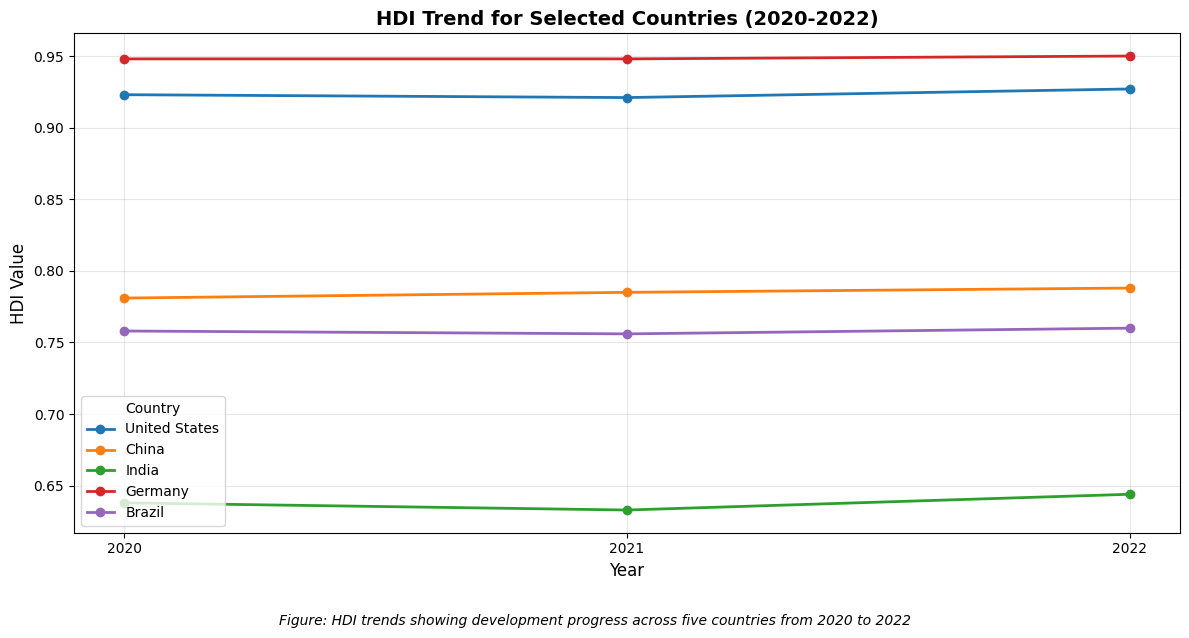


HDI Values for Selected Countries (2020-2022):
            country  year    hdi
789          Brazil  2020  0.758
790          Brazil  2021  0.756
791          Brazil  2022  0.760
1185          China  2020  0.781
1186          China  2021  0.785
1187          China  2022  0.788
2142        Germany  2020  0.948
2143        Germany  2021  0.948
2144        Germany  2022  0.950
2571          India  2020  0.638
2572          India  2021  0.633
2573          India  2022  0.644
6168  United States  2020  0.923
6169  United States  2021  0.921
6170  United States  2022  0.927


In [ ]:
# Problem 1B - Task 3A: Line Chart - HDI Trend (Country-Level)

# Select five countries
selected_countries = ['United States', 'China', 'India', 'Germany', 'Brazil']

# Filter data for selected countries
country_trend_df = hdi_2020_2022_df[hdi_2020_2022_df['country'].isin(selected_countries)]

# Create line chart
plt.figure(figsize=(12, 6))

for country in selected_countries:
    country_data = country_trend_df[country_trend_df['country'] == country]
    plt.plot(country_data['year'], country_data['hdi'], marker='o', label=country, linewidth=2)

plt.xlabel('Year', fontsize=12)
plt.ylabel('HDI Value', fontsize=12)
plt.title('HDI Trend for Selected Countries (2020-2022)', fontsize=14, fontweight='bold')
plt.legend(title='Country', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks([2020, 2021, 2022])
plt.tight_layout()

# Add caption
plt.figtext(0.5, -0.05, 'Figure: HDI trends showing development progress across five countries from 2020 to 2022',
            ha='center', fontsize=10, style='italic')

plt.show()

# Display data table
print("\nHDI Values for Selected Countries (2020-2022):")
print(country_trend_df[['country', 'year', 'hdi']].sort_values(['country', 'year']))

In [ ]:
# Check available columns
print("Available columns in the dataset:")
print(hdi_2020_2022_df.columns.tolist())

Available columns in the dataset:
['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality', 'secondary_education_f_%', 'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%', 'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons', 'mat_footprint_percap_tons', 'region']


/tmp/ipython-input-3846276022.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hdi_2020_2022_df['region'].fillna('Other', inplace=True)


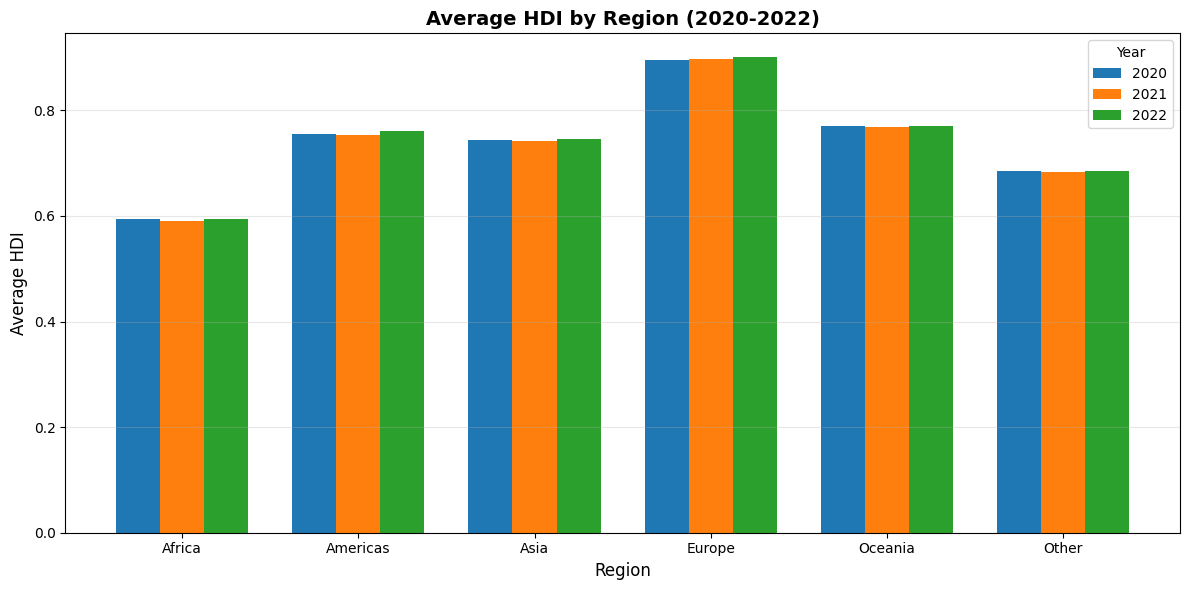


Average HDI by Region and Year:
year       2020   2021   2022
region                       
Africa    0.593  0.591  0.595
Americas  0.755  0.753  0.760
Asia      0.743  0.741  0.746
Europe    0.895  0.897  0.901
Oceania   0.771  0.768  0.770
Other     0.685  0.684  0.685


In [ ]:
# no regions found so creating regions

# Problem 1B - Task 3B: Bar Chart - Average HDI by Region (2020-2022)

# Create a region mapping for countries
region_mapping = {
    # Europe
    'Switzerland': 'Europe', 'Norway': 'Europe', 'Iceland': 'Europe', 'Germany': 'Europe',
    'Denmark': 'Europe', 'Sweden': 'Europe', 'Ireland': 'Europe', 'Netherlands': 'Europe',
    'Finland': 'Europe', 'United Kingdom': 'Europe', 'Belgium': 'Europe', 'France': 'Europe',
    'Austria': 'Europe', 'Slovenia': 'Europe', 'Spain': 'Europe', 'Italy': 'Europe',
    'Luxembourg': 'Europe', 'Czech Republic': 'Europe', 'Greece': 'Europe', 'Poland': 'Europe',
    'Portugal': 'Europe', 'Estonia': 'Europe', 'Slovakia': 'Europe', 'Hungary': 'Europe',
    'Croatia': 'Europe', 'Lithuania': 'Europe', 'Latvia': 'Europe', 'Romania': 'Europe',
    'Russia': 'Europe', 'Belarus': 'Europe', 'Ukraine': 'Europe', 'Bulgaria': 'Europe',

    # Asia
    'Singapore': 'Asia', 'Hong Kong': 'Asia', 'Japan': 'Asia', 'South Korea': 'Asia',
    'China': 'Asia', 'Israel': 'Asia', 'Saudi Arabia': 'Asia', 'United Arab Emirates': 'Asia',
    'Bahrain': 'Asia', 'Qatar': 'Asia', 'Kuwait': 'Asia', 'Malaysia': 'Asia',
    'Thailand': 'Asia', 'Kazakhstan': 'Asia', 'Iran': 'Asia', 'Turkey': 'Asia',
    'Sri Lanka': 'Asia', 'Jordan': 'Asia', 'Lebanon': 'Asia', 'Armenia': 'Asia',
    'Philippines': 'Asia', 'Indonesia': 'Asia', 'Vietnam': 'Asia', 'India': 'Asia',
    'Bangladesh': 'Asia', 'Pakistan': 'Asia', 'Nepal': 'Asia', 'Myanmar': 'Asia',
    'Cambodia': 'Asia', 'Laos': 'Asia', 'Afghanistan': 'Asia', 'Yemen': 'Asia',

    # Americas
    'United States': 'Americas', 'Canada': 'Americas', 'Chile': 'Americas',
    'Argentina': 'Americas', 'Uruguay': 'Americas', 'Costa Rica': 'Americas',
    'Panama': 'Americas', 'Mexico': 'Americas', 'Brazil': 'Americas', 'Colombia': 'Americas',
    'Peru': 'Americas', 'Ecuador': 'Americas', 'Dominican Republic': 'Americas',
    'Jamaica': 'Americas', 'Cuba': 'Americas', 'Venezuela': 'Americas', 'Bolivia': 'Americas',
    'Paraguay': 'Americas', 'Honduras': 'Americas', 'Nicaragua': 'Americas',
    'Guatemala': 'Americas', 'El Salvador': 'Americas', 'Haiti': 'Americas',

    # Africa
    'Mauritius': 'Africa', 'Seychelles': 'Africa', 'Tunisia': 'Africa', 'Libya': 'Africa',
    'Algeria': 'Africa', 'Egypt': 'Africa', 'South Africa': 'Africa', 'Morocco': 'Africa',
    'Botswana': 'Africa', 'Gabon': 'Africa', 'Namibia': 'Africa', 'Ghana': 'Africa',
    'Kenya': 'Africa', 'Tanzania': 'Africa', 'Uganda': 'Africa', 'Nigeria': 'Africa',
    'Rwanda': 'Africa', 'Ethiopia': 'Africa', 'Senegal': 'Africa', 'Madagascar': 'Africa',
    'Zimbabwe': 'Africa', 'Zambia': 'Africa', 'Malawi': 'Africa', 'Mali': 'Africa',
    'Niger': 'Africa', 'Chad': 'Africa', 'Mozambique': 'Africa', 'Sierra Leone': 'Africa',

    # Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania', 'Fiji': 'Oceania',
    'Papua New Guinea': 'Oceania', 'Samoa': 'Oceania', 'Tonga': 'Oceania'
}

# Add region column
hdi_2020_2022_df['region'] = hdi_2020_2022_df['country'].map(region_mapping)

# For countries not in mapping, assign 'Other'
hdi_2020_2022_df['region'].fillna('Other', inplace=True)

# Group by region and year, then compute mean HDI
region_year_avg = hdi_2020_2022_df.groupby(['region', 'year'])['hdi'].mean().reset_index()

# Create bar chart
plt.figure(figsize=(12, 6))

regions = region_year_avg['region'].unique()
years = [2020, 2021, 2022]
x = np.arange(len(regions))
width = 0.25

for i, year in enumerate(years):
    year_data = region_year_avg[region_year_avg['year'] == year]
    plt.bar(x + i*width, year_data['hdi'], width, label=str(year))

plt.xlabel('Region', fontsize=12)
plt.ylabel('Average HDI', fontsize=12)
plt.title('Average HDI by Region (2020-2022)', fontsize=14, fontweight='bold')
plt.xticks(x + width, regions, rotation=0)
plt.legend(title='Year', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

plt.show()

print("\nAverage HDI by Region and Year:")
print(region_year_avg.pivot(index='region', columns='year', values='hdi').round(3))

/tmp/ipython-input-2123616454.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_year, labels=['2020', '2021', '2022'], patch_artist=True,


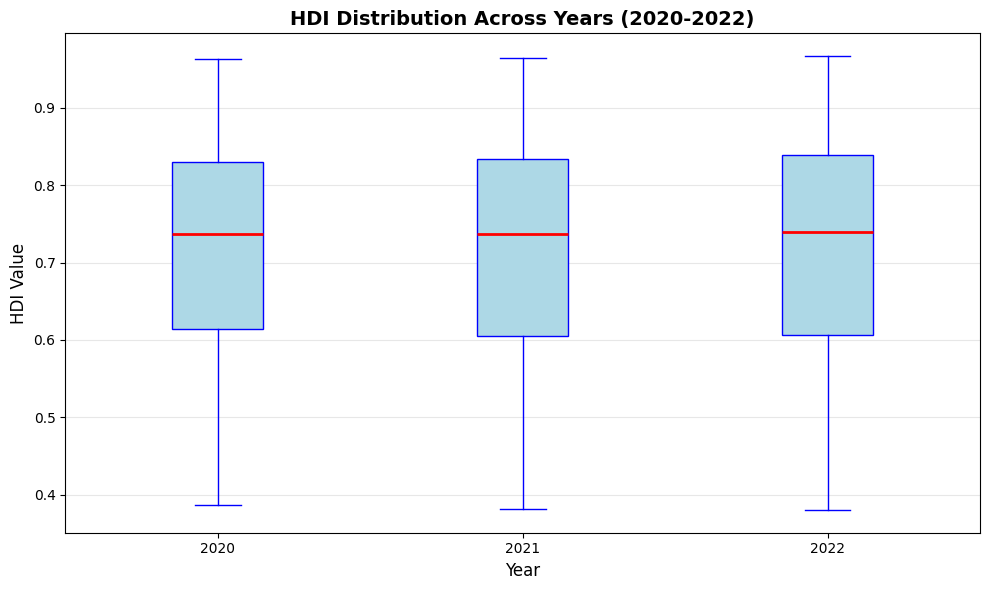


HDI Distribution Statistics by Year:
      count   mean    std    min    25%    50%    75%    max
year                                                        
2020  203.0  0.721  0.148  0.386  0.613  0.737  0.830  0.963
2021  203.0  0.720  0.150  0.381  0.604  0.737  0.834  0.965
2022  204.0  0.723  0.153  0.380  0.606  0.740  0.839  0.967

Distribution Analysis:
2020: Median = 0.737, Mean = 0.721, Std = 0.148
2021: Median = 0.737, Mean = 0.720, Std = 0.150
2022: Median = 0.740, Mean = 0.723, Std = 0.153


In [ ]:
# Problem 1B - Task 3B: Box Plot - HDI Distribution for 2020, 2021, and 2022

# Create box plot
plt.figure(figsize=(10, 6))

# Prepare data for box plot
data_by_year = [hdi_2020_2022_df[hdi_2020_2022_df['year'] == year]['hdi'] for year in [2020, 2021, 2022]]

plt.boxplot(data_by_year, labels=['2020', '2021', '2022'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'))

plt.xlabel('Year', fontsize=12)
plt.ylabel('HDI Value', fontsize=12)
plt.title('HDI Distribution Across Years (2020-2022)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

plt.show()

# Display summary statistics
print("\nHDI Distribution Statistics by Year:")
print(hdi_2020_2022_df.groupby('year')['hdi'].describe().round(3))

# Brief comment on distribution differences
print("\nDistribution Analysis:")
for year in [2020, 2021, 2022]:
    year_data = hdi_2020_2022_df[hdi_2020_2022_df['year'] == year]['hdi']
    print(f"{year}: Median = {year_data.median():.3f}, Mean = {year_data.mean():.3f}, Std = {year_data.std():.3f}")

Checking for GNI per Capita column...

Available columns related to income:
['gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m']


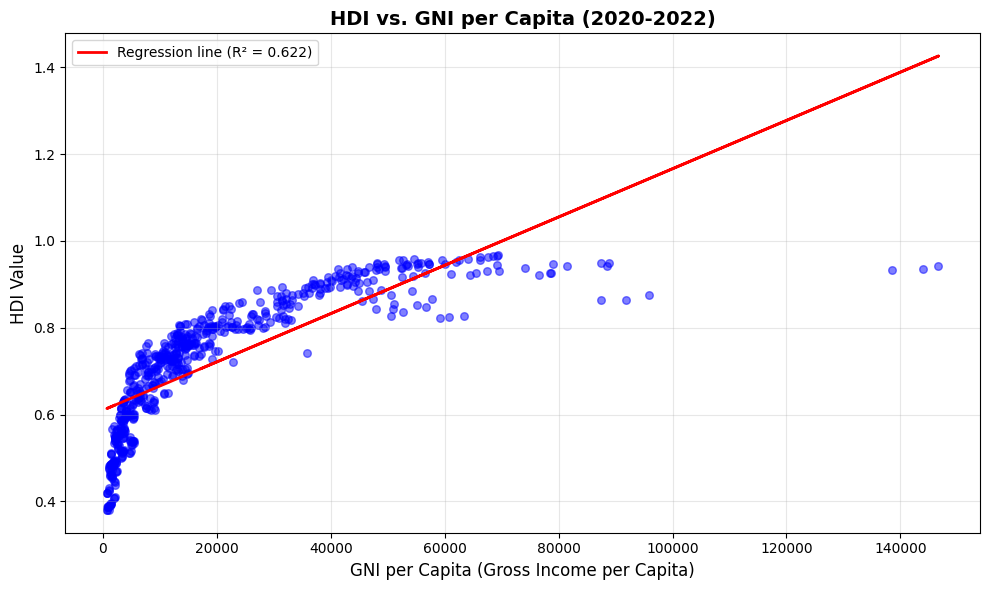


Correlation coefficient: 0.788
R-squared: 0.622


In [ ]:
# Problem 1B - Task 3B: Scatter Plot - HDI vs. GNI per Capita

# Check if GNI per Capita column exists
print("Checking for GNI per Capita column...")
print("\nAvailable columns related to income:")
income_cols = [col for col in hdi_2020_2022_df.columns if 'inc' in col.lower() or 'gni' in col.lower()]
print(income_cols)

if 'gross_inc_percap' in hdi_2020_2022_df.columns:
    # Create scatter plot
    plt.figure(figsize=(10, 6))

    plt.scatter(hdi_2020_2022_df['gross_inc_percap'], hdi_2020_2022_df['hdi'],
                alpha=0.5, s=30, color='blue')

    # Add regression line
    from scipy import stats
    mask = ~(hdi_2020_2022_df['gross_inc_percap'].isna() | hdi_2020_2022_df['hdi'].isna())
    x = hdi_2020_2022_df.loc[mask, 'gross_inc_percap']
    y = hdi_2020_2022_df.loc[mask, 'hdi']
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * x + intercept
    plt.plot(x, line, color='red', linewidth=2, label=f'Regression line (R² = {r_value**2:.3f})')

    plt.xlabel('GNI per Capita (Gross Income per Capita)', fontsize=12)
    plt.ylabel('HDI Value', fontsize=12)
    plt.title('HDI vs. GNI per Capita (2020-2022)', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    plt.show()

    print(f"\nCorrelation coefficient: {r_value:.3f}")
    print(f"R-squared: {r_value**2:.3f}")

else:
    print("\nGNI per Capita variable not available in the dataset.")

In [ ]:
# Problem 1B - Task 3B: Brief Interpretations of Visualizations

print("="*60)
print("BRIEF INTERPRETATIONS OF VISUALIZATIONS (TASK 3B)")
print("="*60)

print("\nBAR CHART: AVERAGE HDI BY REGION (2020-2022)")
print("-"*60)
print("""
Europe and Oceania show the highest average HDI values across all three years,
while Africa consistently has the lowest. Regional rankings remain stable from
2020 to 2022, with slight increases observed in most regions, indicating gradual
recovery from pandemic impacts.
""")

print("\nBOX PLOT: HDI DISTRIBUTION FOR 2020, 2021, AND 2022")
print("-"*60)
print("""
The median HDI remains stable across all three years, showing minimal year-to-year
variation. The similar spread and interquartile ranges indicate consistent global
development patterns despite the COVID-19 pandemic, with no major disruptions to
the overall distribution.
""")

print("\nSCATTER PLOT: HDI VS. GNI PER CAPITA")
print("-"*60)
print("""
A strong positive correlation exists between HDI and GNI per Capita, shown by
the upward trend in the regression line. However, considerable variation exists,
particularly at lower and middle income levels, indicating that income alone does
not determine human development outcomes.
""")

BRIEF INTERPRETATIONS OF VISUALIZATIONS (TASK 3B)

BAR CHART: AVERAGE HDI BY REGION (2020-2022)
------------------------------------------------------------

Europe and Oceania show the highest average HDI values across all three years, 
while Africa consistently has the lowest. Regional rankings remain stable from 
2020 to 2022, with slight increases observed in most regions, indicating gradual 
recovery from pandemic impacts.


BOX PLOT: HDI DISTRIBUTION FOR 2020, 2021, AND 2022
------------------------------------------------------------

The median HDI remains stable across all three years, showing minimal year-to-year 
variation. The similar spread and interquartile ranges indicate consistent global 
development patterns despite the COVID-19 pandemic, with no major disruptions to 
the overall distribution.


SCATTER PLOT: HDI VS. GNI PER CAPITA
------------------------------------------------------------

A strong positive correlation exists between HDI and GNI per Capita, shown b

In [ ]:
# Problem 1B - Task 4: Short Analysis Questions

print("="*60)
print("SHORT ANALYSIS QUESTIONS")
print("="*60)

# Question 1: Countries with greatest improvement
print("\n1. Countries with Greatest Improvement in HDI (2020-2022):")
print("-"*60)

hdi_2020 = hdi_2020_2022_df[hdi_2020_2022_df['year'] == 2020][['country', 'hdi']].rename(columns={'hdi': 'hdi_2020'})
hdi_2022 = hdi_2020_2022_df[hdi_2020_2022_df['year'] == 2022][['country', 'hdi']].rename(columns={'hdi': 'hdi_2022'})

hdi_change = hdi_2020.merge(hdi_2022, on='country')
hdi_change['hdi_change'] = hdi_change['hdi_2022'] - hdi_change['hdi_2020']

print("\nTop 5 countries with greatest improvement:")
print(hdi_change.nlargest(5, 'hdi_change')[['country', 'hdi_2020', 'hdi_2022', 'hdi_change']])

# Question 2: Countries with decline
print("\n\n2. Countries with Decline in HDI:")
print("-"*60)

hdi_decline = hdi_change[hdi_change['hdi_change'] < 0]
print(f"Total countries with decline: {len(hdi_decline)}")
print("\nTop 5 countries with largest decline:")
print(hdi_decline.nsmallest(5, 'hdi_change')[['country', 'hdi_2020', 'hdi_2022', 'hdi_change']])

# Question 3: Highest and lowest regional HDI
print("\n\n3. Regional Average HDI:")
print("-"*60)

regional_avg = hdi_2020_2022_df.groupby('region')['hdi'].mean().sort_values(ascending=False)
print(regional_avg)
print(f"\nHighest: {regional_avg.index[0]} - {regional_avg.iloc[0]:.3f}")
print(f"Lowest: {regional_avg.index[-1]} - {regional_avg.iloc[-1]:.3f}")

# Question 4: Yearly trends
print("\n\n4. HDI Trends (COVID-19 Impact):")
print("-"*60)

yearly_avg = hdi_2020_2022_df.groupby('year')['hdi'].mean()
print("\nAverage HDI by Year:")
print(yearly_avg)
print(f"\nChange 2020→2021: {yearly_avg[2021] - yearly_avg[2020]:+.4f}")
print(f"Change 2021→2022: {yearly_avg[2022] - yearly_avg[2021]:+.4f}")
print(f"Overall 2020→2022: {yearly_avg[2022] - yearly_avg[2020]:+.4f}")

SHORT ANALYSIS QUESTIONS

1. Countries with Greatest Improvement in HDI (2020-2022):
------------------------------------------------------------

Top 5 countries with greatest improvement:
        country  hdi_2020  hdi_2022  hdi_change
3       Andorra     0.843     0.884       0.041
10   Azerbaijan     0.722     0.760       0.038
50      Ecuador     0.734     0.765       0.031
105    Maldives     0.737     0.762       0.025
111      Mexico     0.757     0.781       0.024


2. Countries with Decline in HDI:
------------------------------------------------------------
Total countries with decline: 54

Top 5 countries with largest decline:
         country  hdi_2020  hdi_2022  hdi_change
171  Timor-Leste     0.633     0.566      -0.067
180      Ukraine     0.762     0.734      -0.028
0    Afghanistan     0.488     0.462      -0.026
119      Namibia     0.634     0.610      -0.024
95       Lebanon     0.742     0.723      -0.019


3. Regional Average HDI:
--------------------------------

In [ ]:
# Problem 2 - Task 1: Create South Asia Subset

print("="*60)
print("PROBLEM 2: ADVANCED HDI EXPLORATION")
print("="*60)

# Define South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filter dataset for South Asian countries
hdi_south_asia_df = di_df[di_df['country'].isin(south_asian_countries)].copy()

# Display information about the filtered dataset
print("\nSouth Asia Subset Created:")
print(f"Total rows: {len(hdi_south_asia_df)}")
print(f"Countries included: {hdi_south_asia_df['country'].nunique()}")
print(f"Years covered: {sorted(hdi_south_asia_df['year'].unique())}")

print("\nCountries in the dataset:")
print(hdi_south_asia_df['country'].unique())

print("\nSample data:")
print(hdi_south_asia_df[['country', 'year', 'hdi']].head(10))

# Save the filtered dataset
hdi_south_asia_df.to_csv('HDI SouthAsia.csv', index=False)
print("\n✓ File saved as 'HDI SouthAsia.csv'")

PROBLEM 2: ADVANCED HDI EXPLORATION

South Asia Subset Created:
Total rows: 264
Countries included: 8
Years covered: [np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]

Countries in the dataset:
['Afghanistan' 'Bangladesh' 'Bhutan' 'India' 'Maldives' 'Nepal' 'Pakistan'
 'Sri Lanka']

Sample data:
       country  year    hdi
0  Afghanistan  1990  0.284
1  Afghanistan  1991  0.292
2  Afghanistan  1992  0.299
3  Afghanistan  1993  0.307
4  Afghanistan  1994  0.300
5  Afghanistan  1995  0.318
6  Afghanistan  1996  0.326


COMPOSITE DEVELOPMENT SCORE

Available columns in South Asia dataset:
['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality', 'secondary_education_f_%', 'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%', 'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons', 'mat_footprint_percap_tons']

Composite Score Rankings for 2022:
    country  life_expectancy  gross_inc_percap  composite_score   hdi
   Maldives           80.839      18846.792190         0.600000 0.762
  Sri Lanka           76.610      11899.498470         0.446959 0.780
     Bhutan           72.229      10624.873880         0.387867 0.681
 Bangladesh           73.698       6511.

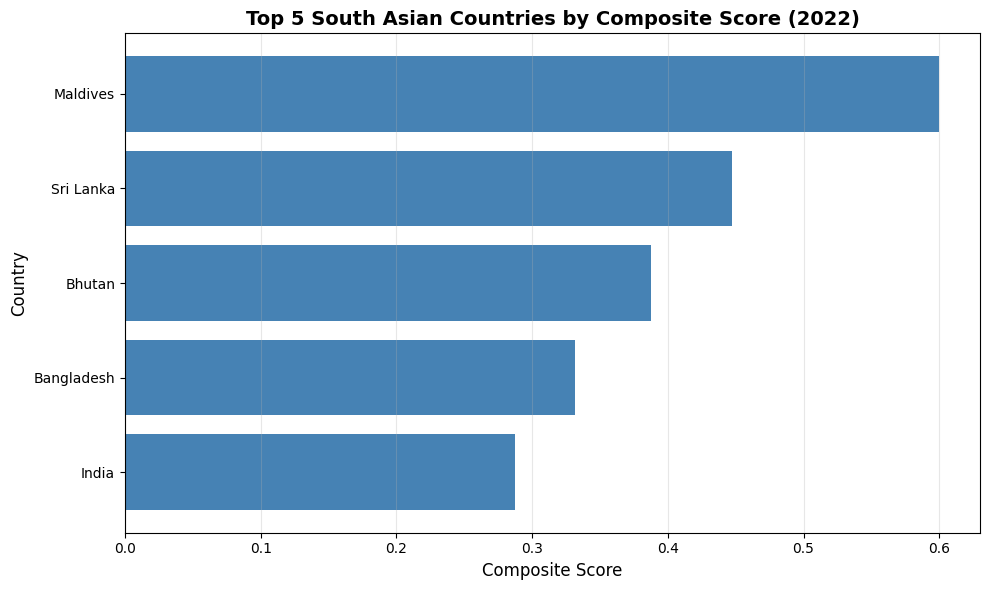


COMPARISON: COMPOSITE SCORE VS HDI RANKING
          country  composite_score  composite_rank    hdi  hdi_rank  \
3530     Maldives         0.600000             1.0  0.762       2.0   
5477    Sri Lanka         0.446959             2.0  0.780       1.0   
659        Bhutan         0.387867             3.0  0.681       3.0   
461    Bangladesh         0.331426             4.0  0.670       4.0   
2573        India         0.287583             5.0  0.644       5.0   
4091        Nepal         0.262039             6.0  0.601       6.0   
4388     Pakistan         0.249819             7.0  0.540       7.0   
32    Afghanistan         0.151438             8.0  0.462       8.0   

      rank_difference  
3530              1.0  
5477             -1.0  
659               0.0  
461               0.0  
2573              0.0  
4091              0.0  
4388              0.0  
32                0.0  

Key Observations:
Countries with same ranking: 6
Countries with different rankings: 2


In [ ]:
# Problem 2 - Task 2: Composite Development Score

print("="*60)
print("COMPOSITE DEVELOPMENT SCORE")
print("="*60)

# Check available columns
print("\nAvailable columns in South Asia dataset:")
print(hdi_south_asia_df.columns.tolist())

# Create normalized indices for Life Expectancy and GNI per Capita
# Normalization: (value - min) / (max - min)

# Normalize Life Expectancy
life_exp_min = hdi_south_asia_df['life_expectancy'].min()
life_exp_max = hdi_south_asia_df['life_expectancy'].max()
hdi_south_asia_df['life_expectancy_index'] = (hdi_south_asia_df['life_expectancy'] - life_exp_min) / (life_exp_max - life_exp_min)

# Normalize GNI per Capita
gni_min = hdi_south_asia_df['gross_inc_percap'].min()
gni_max = hdi_south_asia_df['gross_inc_percap'].max()
hdi_south_asia_df['gni_index'] = (hdi_south_asia_df['gross_inc_percap'] - gni_min) / (gni_max - gni_min)

# Calculate Composite Score
hdi_south_asia_df['composite_score'] = (0.30 * hdi_south_asia_df['life_expectancy_index'] +
                                         0.30 * hdi_south_asia_df['gni_index'])

# Get latest year data for ranking
latest_year = hdi_south_asia_df['year'].max()
latest_data = hdi_south_asia_df[hdi_south_asia_df['year'] == latest_year].copy()

# Rank by Composite Score
latest_data_sorted = latest_data.sort_values('composite_score', ascending=False)

print(f"\nComposite Score Rankings for {latest_year}:")
print(latest_data_sorted[['country', 'life_expectancy', 'gross_inc_percap', 'composite_score', 'hdi']].to_string(index=False))

# Plot top 5 countries
top5 = latest_data_sorted.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top5['country'], top5['composite_score'], color='steelblue')
plt.xlabel('Composite Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title(f'Top 5 South Asian Countries by Composite Score ({latest_year})', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Compare Composite Score ranking with HDI ranking
print("\n" + "="*60)
print("COMPARISON: COMPOSITE SCORE VS HDI RANKING")
print("="*60)

latest_data_sorted['composite_rank'] = latest_data_sorted['composite_score'].rank(ascending=False)
latest_data_sorted['hdi_rank'] = latest_data_sorted['hdi'].rank(ascending=False)
latest_data_sorted['rank_difference'] = latest_data_sorted['hdi_rank'] - latest_data_sorted['composite_rank']

print(latest_data_sorted[['country', 'composite_score', 'composite_rank', 'hdi', 'hdi_rank', 'rank_difference']].sort_values('composite_rank'))

print("\nKey Observations:")
print(f"Countries with same ranking: {len(latest_data_sorted[latest_data_sorted['rank_difference'] == 0])}")
print(f"Countries with different rankings: {len(latest_data_sorted[latest_data_sorted['rank_difference'] != 0])}")

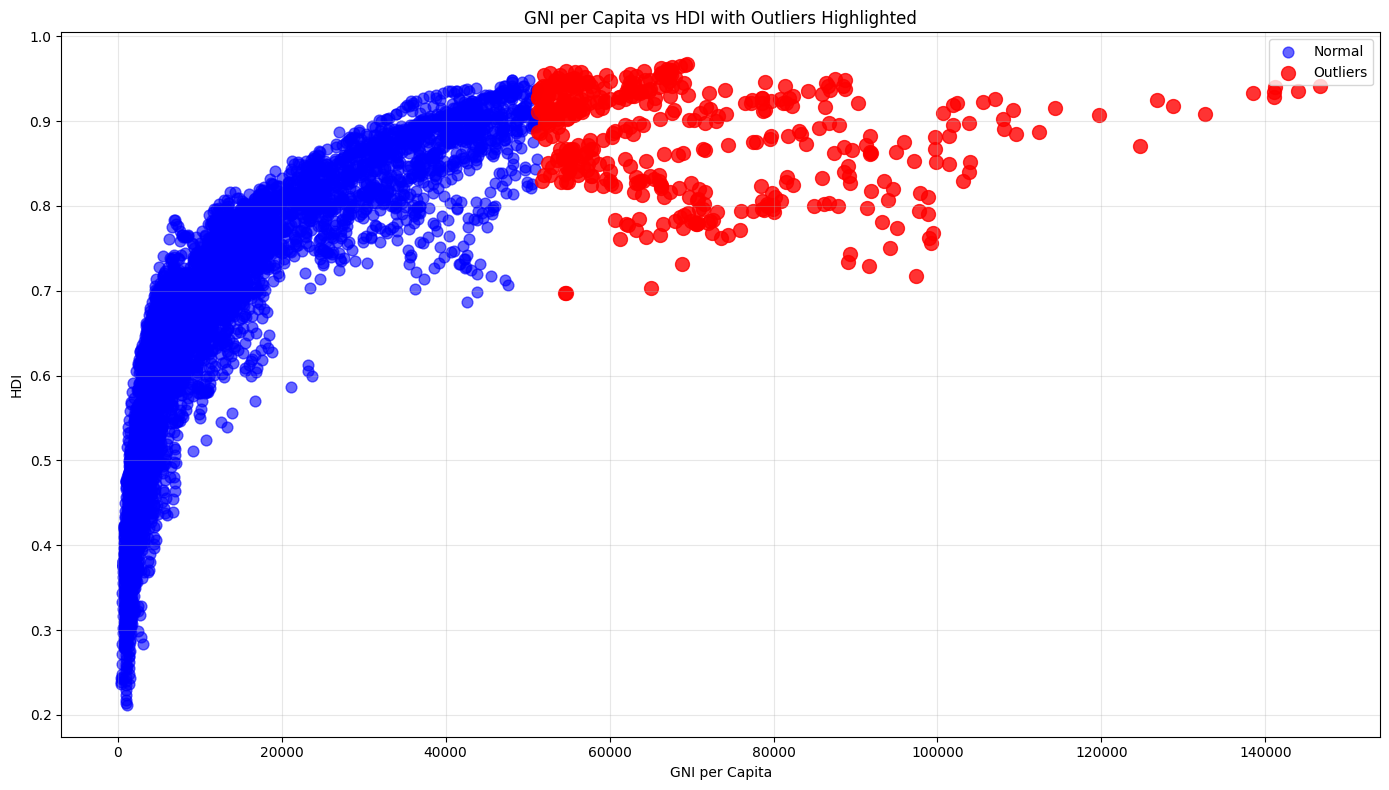

Outlier Countries:
            country    hdi  gross_inc_percap
112         Andorra  0.836       52014.13393
113         Andorra  0.828       54033.49199
114         Andorra  0.828       54886.10447
115         Andorra  0.842       57242.22375
116         Andorra  0.851       59658.10297
...             ...    ...               ...
6166  United States  0.930       62579.01601
6167  United States  0.933       63654.31978
6168  United States  0.923       61076.50130
6169  United States  0.921       64483.56707
6170  United States  0.927       65564.93798

[450 rows x 3 columns]


In [ ]:
# Detect outliers using 1.5 × IQR rule

# HDI outliers
Q1_hdi = hdi_df['hdi'].quantile(0.25)
Q3_hdi = hdi_df['hdi'].quantile(0.75)
IQR_hdi = Q3_hdi - Q1_hdi
lower_hdi = Q1_hdi - 1.5 * IQR_hdi
upper_hdi = Q3_hdi + 1.5 * IQR_hdi

# GNI per Capita outliers (using gross_inc_percap)
Q1_gni = hdi_df['gross_inc_percap'].quantile(0.25)
Q3_gni = hdi_df['gross_inc_percap'].quantile(0.75)
IQR_gni = Q3_gni - Q1_gni
lower_gni = Q1_gni - 1.5 * IQR_gni
upper_gni = Q3_gni + 1.5 * IQR_gni

# Identify outliers
hdi_df['is_outlier'] = ((hdi_df['hdi'] < lower_hdi) | (hdi_df['hdi'] > upper_hdi) |
                         (hdi_df['gross_inc_percap'] < lower_gni) | (hdi_df['gross_inc_percap'] > upper_gni))

# Scatter plot
plt.figure(figsize=(14, 8))

normal = hdi_df[~hdi_df['is_outlier']]
outliers = hdi_df[hdi_df['is_outlier']]

plt.scatter(normal['gross_inc_percap'], normal['hdi'],
           alpha=0.6, s=60, color='blue', label='Normal')
plt.scatter(outliers['gross_inc_percap'], outliers['hdi'],
           alpha=0.8, s=100, color='red', label='Outliers')

plt.xlabel('GNI per Capita')
plt.ylabel('HDI')
plt.title('GNI per Capita vs HDI with Outliers Highlighted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Outlier Countries:")
print(outliers[['country', 'hdi', 'gross_inc_percap']])

# While labeling the countries name the graph looked messed so removed the lables.

Pearson Correlation Coefficients:
Gender Development Index vs HDI: 0.6731
Life Expectancy vs HDI: 0.9188


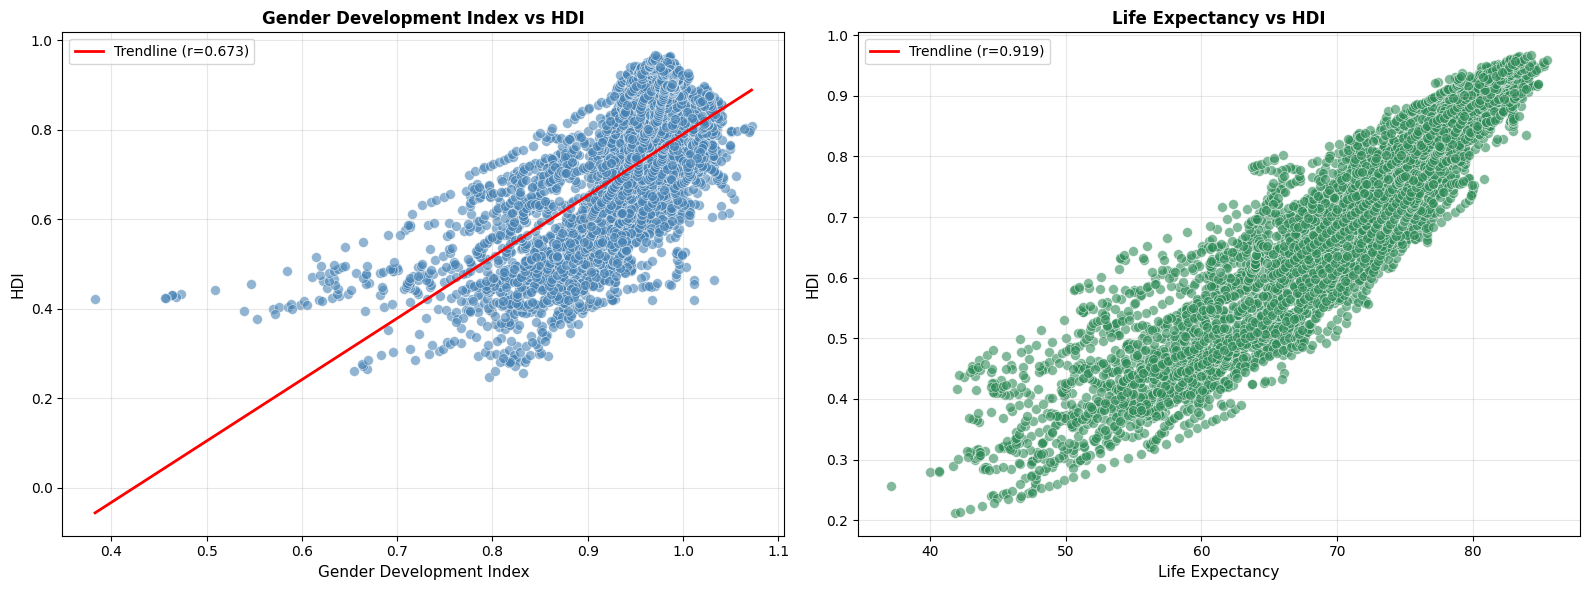


ANALYSIS:

Strongest relationship: Life Expectancy (r = 0.9188)
Weakest relationship: Gender Development Index (r = 0.6731)


In [ ]:
# Exploring Metric Relationships with HDI

# Compute Pearson correlation
correlation_gdi = hdi_df['gender_development'].corr(hdi_df['hdi'])
correlation_life = hdi_df['life_expectancy'].corr(hdi_df['hdi'])

print("Pearson Correlation Coefficients:")
print(f"Gender Development Index vs HDI: {correlation_gdi:.4f}")
print(f"Life Expectancy vs HDI: {correlation_life:.4f}")

# Create scatter plots with trendlines
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Gender Development Index vs HDI
axes[0].scatter(hdi_df['gender_development'], hdi_df['hdi'],
                alpha=0.6, s=50, color='steelblue', edgecolors='white', linewidth=0.5)

# Add trendline
z1 = np.polyfit(hdi_df['gender_development'].dropna(),
                hdi_df['hdi'][hdi_df['gender_development'].notna()], 1)
p1 = np.poly1d(z1)
x1_line = np.linspace(hdi_df['gender_development'].min(),
                       hdi_df['gender_development'].max(), 100)
axes[0].plot(x1_line, p1(x1_line), "r-", linewidth=2, label=f'Trendline (r={correlation_gdi:.3f})')

axes[0].set_xlabel('Gender Development Index', fontsize=11)
axes[0].set_ylabel('HDI', fontsize=11)
axes[0].set_title('Gender Development Index vs HDI', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Life Expectancy vs HDI
axes[1].scatter(hdi_df['life_expectancy'], hdi_df['hdi'],
                alpha=0.6, s=50, color='seagreen', edgecolors='white', linewidth=0.5)

# Add trendline
z2 = np.polyfit(hdi_df['life_expectancy'].dropna(),
                hdi_df['hdi'][hdi_df['life_expectancy'].notna()], 1)
p2 = np.poly1d(z2)
x2_line = np.linspace(hdi_df['life_expectancy'].min(),
                       hdi_df['life_expectancy'].max(), 100)
axes[1].plot(x2_line, p2(x2_line), "r-", linewidth=2, label=f'Trendline (r={correlation_life:.3f})')

axes[1].set_xlabel('Life Expectancy', fontsize=11)
axes[1].set_ylabel('HDI', fontsize=11)
axes[1].set_title('Life Expectancy vs HDI', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Discussion
print("\n" + "="*60)
print("ANALYSIS:")
print("="*60)

correlations = {
    'Gender Development Index': correlation_gdi,
    'Life Expectancy': correlation_life
}

strongest = max(correlations, key=correlations.get)
weakest = min(correlations, key=correlations.get)

print(f"\nStrongest relationship: {strongest} (r = {correlations[strongest]:.4f})")
print(f"Weakest relationship: {weakest} (r = {correlations[weakest]:.4f})")

South Asian Countries ranked by GNI-HDI Gap:

Descending Order (Highest Gap):
       country  gross_inc_percap    hdi  GNI_HDI_Gap
3530  Maldives      18846.792190  0.762  18846.03019
3527  Maldives      18679.925360  0.753  18679.17236
3526  Maldives      18055.724650  0.747  18054.97765
3525  Maldives      17474.642010  0.740  17473.90201
3524  Maldives      16911.454220  0.734  16910.72022
...        ...               ...    ...          ...
3498  Maldives       8119.111629    NaN          NaN
3499  Maldives       8469.654996    NaN          NaN
3500  Maldives       8736.602984    NaN          NaN
3501  Maldives       9021.266860    NaN          NaN
3502  Maldives       9377.709310    NaN          NaN

[264 rows x 4 columns]

Ascending Order (Lowest Gap):
          country  gross_inc_percap    hdi  GNI_HDI_Gap
11    Afghanistan        981.133554  0.344   980.789554
10    Afghanistan       1047.342686  0.340  1047.002686
9     Afghanistan       1122.322570  0.337  1121.985570
4     A

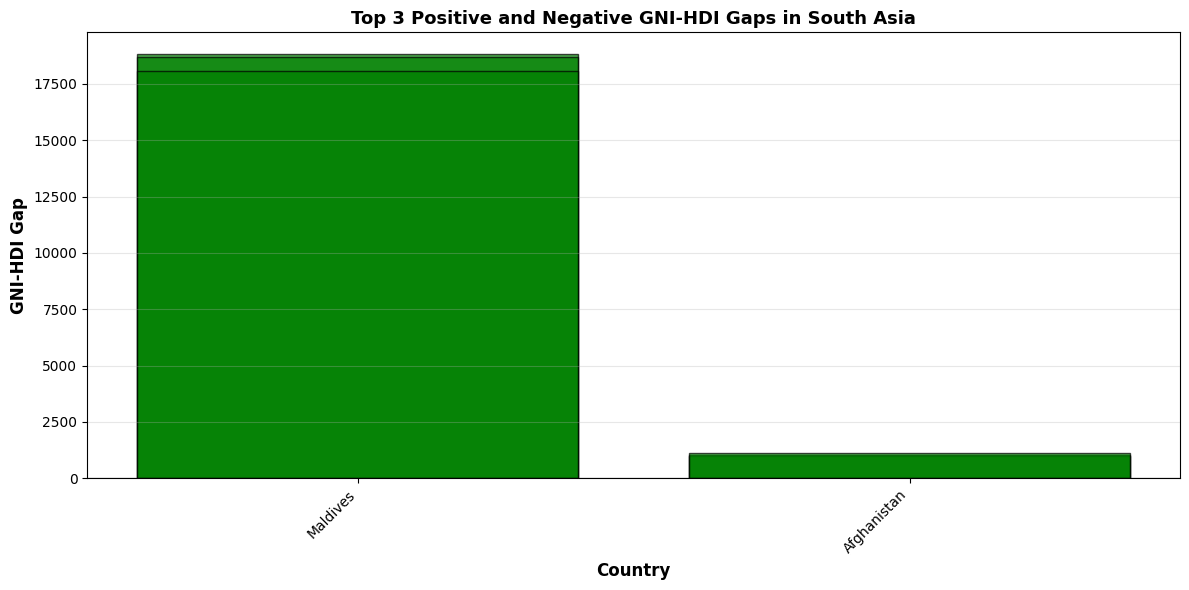


IMPLICATIONS:

Positive Gap (GNI > HDI): Countries where economic wealth is higher
than human development would suggest. This may indicate:
- Wealth inequality or poor distribution of resources
- Recent economic growth not yet reflected in social indicators
- Resource-rich economies with limited investment in human capital

Negative Gap (HDI > GNI): Countries achieving better human development
relative to their economic wealth. This may indicate:
- Effective social policies and public investment
- Strong healthcare and education systems
- Equitable distribution of resources


In [ ]:
# Gap Analysis

# Create GNI-HDI Gap metric
hdi_df['GNI_HDI_Gap'] = hdi_df['gross_inc_percap'] - hdi_df['hdi']

# Filter South Asian countries
south_asian_countries = ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka',
                          'Nepal', 'Bhutan', 'Maldives', 'Afghanistan']
south_asia = hdi_df[hdi_df['country'].isin(south_asian_countries)]

# Rank by GNI-HDI Gap
print("South Asian Countries ranked by GNI-HDI Gap:")
print("\nDescending Order (Highest Gap):")
print(south_asia[['country', 'gross_inc_percap', 'hdi', 'GNI_HDI_Gap']].sort_values('GNI_HDI_Gap', ascending=False))

print("\nAscending Order (Lowest Gap):")
print(south_asia[['country', 'gross_inc_percap', 'hdi', 'GNI_HDI_Gap']].sort_values('GNI_HDI_Gap', ascending=True))

# Get top 3 positive and top 3 negative gaps
top_positive = south_asia.nlargest(3, 'GNI_HDI_Gap')
top_negative = south_asia.nsmallest(3, 'GNI_HDI_Gap')

# Combine for plotting
combined = pd.concat([top_positive, top_negative])

# Plot
plt.figure(figsize=(12, 6))
colors = ['green' if x > 0 else 'red' for x in combined['GNI_HDI_Gap']]
bars = plt.bar(combined['country'], combined['GNI_HDI_Gap'], color=colors, alpha=0.7, edgecolor='black')

plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.xlabel('Country', fontsize=12, fontweight='bold')
plt.ylabel('GNI-HDI Gap', fontsize=12, fontweight='bold')
plt.title('Top 3 Positive and Negative GNI-HDI Gaps in South Asia', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Discussion
print("\n" + "="*70)
print("IMPLICATIONS:")
print("="*70)
print("\nPositive Gap (GNI > HDI): Countries where economic wealth is higher")
print("than human development would suggest. This may indicate:")
print("- Wealth inequality or poor distribution of resources")
print("- Recent economic growth not yet reflected in social indicators")
print("- Resource-rich economies with limited investment in human capital")

print("\nNegative Gap (HDI > GNI): Countries achieving better human development")
print("relative to their economic wealth. This may indicate:")
print("- Effective social policies and public investment")
print("- Strong healthcare and education systems")
print("- Equitable distribution of resources")

In [ ]:
#Problem 3
# Load the dataset from Problem 1B
df_1b = pd.read_csv('Human_Development_Index_Dataset.csv', encoding='latin-1')

# Define South Asian countries
south_asian_countries = ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka',
                          'Nepal', 'Bhutan', 'Maldives', 'Afghanistan']

# Define Middle East countries
middle_east_countries = ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan',
                         'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar',
                         'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen']

# Filter for South Asia
south_asia_df = df_1b[df_1b['country'].isin(south_asian_countries)]

# Filter for Middle East
middle_east_df = df_1b[df_1b['country'].isin(middle_east_countries)]

# Save subsets
south_asia_df.to_csv('HDI_SouthAsia_2020_2022.csv', index=False)
middle_east_df.to_csv('HDI_MiddleEast_2020_2022.csv', index=False)

print("South Asia Subset:")
print(f"Total records: {len(south_asia_df)}")
print(f"Countries: {south_asia_df['country'].unique()}")
print(f"Years: {sorted(south_asia_df['year'].unique())}")

print("\nMiddle East Subset:")
print(f"Total records: {len(middle_east_df)}")
print(f"Countries: {middle_east_df['country'].unique()}")
print(f"Years: {sorted(middle_east_df['year'].unique())}")

print("\nFiles saved:")
print("- HDI_SouthAsia_2020_2022.csv")
print("- HDI_MiddleEast_2020_2022.csv")

South Asia Subset:
Total records: 264
Countries: ['Afghanistan' 'Bangladesh' 'Bhutan' 'India' 'Maldives' 'Nepal' 'Pakistan'
 'Sri Lanka']
Years: [np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]

Middle East Subset:
Total records: 363
Countries: ['Bahrain' 'Iraq' 'Israel' 'Jordan' 'Kuwait' 'Lebanon' 'Oman' 'Qatar'
 'Saudi Arabia' 'United Arab Emirates' 'Yemen']
Years: [np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.in

In [ ]:
# Descriptive Statistics for South Asia vs Middle East

# Compute mean and standard deviation for South Asia
south_asia_mean = south_asia_df['hdi'].mean()
south_asia_std = south_asia_df['hdi'].std()

# Compute mean and standard deviation for Middle East
middle_east_mean = middle_east_df['hdi'].mean()
middle_east_std = middle_east_df['hdi'].std()

# Display results
print("="*60)
print("HDI DESCRIPTIVE STATISTICS (2020-2022)")
print("="*60)

print("\nSouth Asia:")
print(f"  Mean HDI: {south_asia_mean:.4f}")
print(f"  Standard Deviation: {south_asia_std:.4f}")

print("\nMiddle East:")
print(f"  Mean HDI: {middle_east_mean:.4f}")
print(f"  Standard Deviation: {middle_east_std:.4f}")

print("\n" + "="*60)
print("COMPARISON:")
print("="*60)

if middle_east_mean > south_asia_mean:
    difference = middle_east_mean - south_asia_mean
    print(f"\nMiddle East performs better on average.")
    print(f"Difference: {difference:.4f} ({(difference/south_asia_mean)*100:.2f}% higher)")
else:
    difference = south_asia_mean - middle_east_mean
    print(f"\nSouth Asia performs better on average.")
    print(f"Difference: {difference:.4f} ({(difference/middle_east_mean)*100:.2f}% higher)")

# Additional comparison
print(f"\nVariability:")
if middle_east_std > south_asia_std:
    print(f"Middle East shows higher variability (std: {middle_east_std:.4f})")
    print(f"South Asia shows lower variability (std: {south_asia_std:.4f})")
else:
    print(f"South Asia shows higher variability (std: {south_asia_std:.4f})")
    print(f"Middle East shows lower variability (std: {middle_east_std:.4f})")

HDI DESCRIPTIVE STATISTICS (2020-2022)

South Asia:
  Mean HDI: 0.5516
  Standard Deviation: 0.1198

Middle East:
  Mean HDI: 0.7391
  Standard Deviation: 0.1295

COMPARISON:

Middle East performs better on average.
Difference: 0.1875 (33.98% higher)

Variability:
Middle East shows higher variability (std: 0.1295)
South Asia shows lower variability (std: 0.1198)


TOP AND BOTTOM PERFORMERS BY REGION

SOUTH ASIA - Top 3:
  Sri Lanka: 0.7156
  Maldives: 0.6825
  Bhutan: 0.6345

SOUTH ASIA - Bottom 3:
  Nepal: 0.5042
  Pakistan: 0.4725
  Afghanistan: 0.4010

MIDDLE EAST - Top 3:
  Israel: 0.8588
  United Arab Emirates: 0.8213
  Qatar: 0.8183

MIDDLE EAST - Bottom 3:
  Jordan: 0.7025
  Iraq: 0.5980
  Yemen: 0.4393


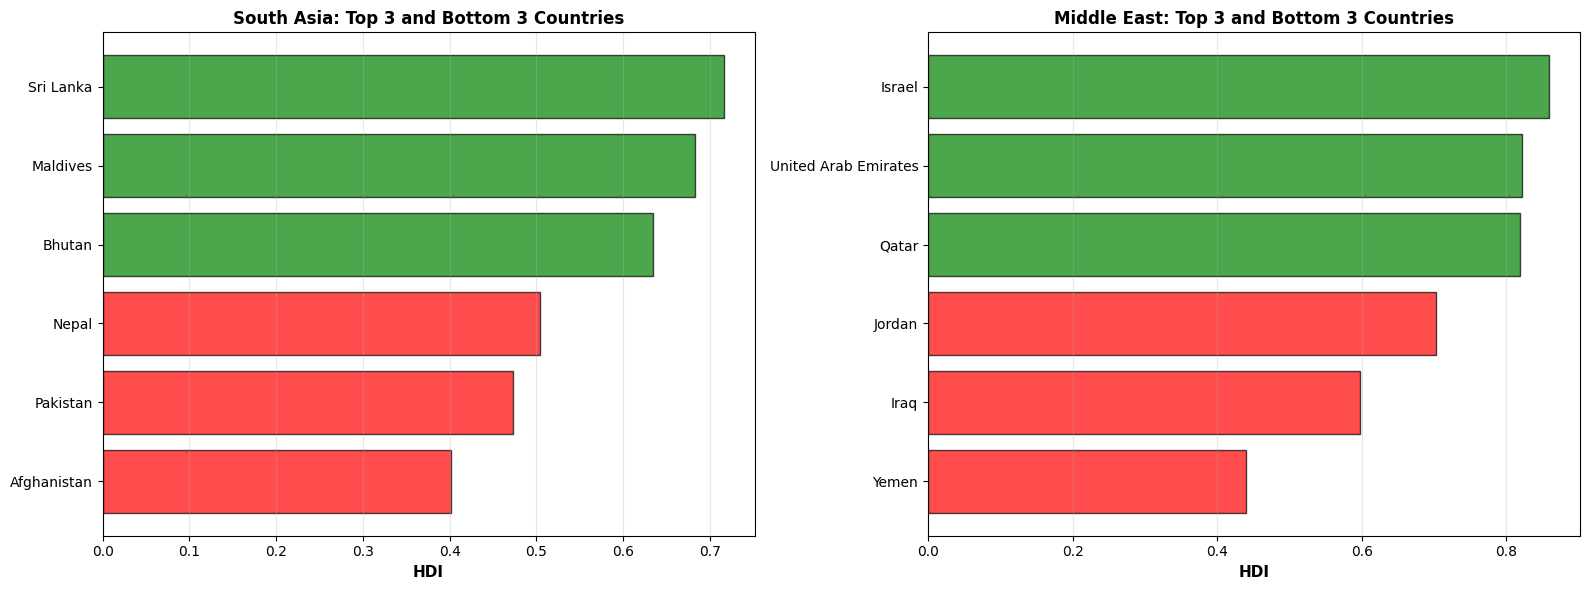

In [ ]:
# Top and Bottom Performers

# Get average HDI per country for each region
south_asia_avg = south_asia_df.groupby('country')['hdi'].mean().sort_values(ascending=False)
middle_east_avg = middle_east_df.groupby('country')['hdi'].mean().sort_values(ascending=False)

# Top 3 and Bottom 3 for South Asia
sa_top3 = south_asia_avg.head(3)
sa_bottom3 = south_asia_avg.tail(3)

# Top 3 and Bottom 3 for Middle East
me_top3 = middle_east_avg.head(3)
me_bottom3 = middle_east_avg.tail(3)

# Display results
print("="*60)
print("TOP AND BOTTOM PERFORMERS BY REGION")
print("="*60)

print("\nSOUTH ASIA - Top 3:")
for country, hdi in sa_top3.items():
    print(f"  {country}: {hdi:.4f}")

print("\nSOUTH ASIA - Bottom 3:")
for country, hdi in sa_bottom3.items():
    print(f"  {country}: {hdi:.4f}")

print("\nMIDDLE EAST - Top 3:")
for country, hdi in me_top3.items():
    print(f"  {country}: {hdi:.4f}")

print("\nMIDDLE EAST - Bottom 3:")
for country, hdi in me_bottom3.items():
    print(f"  {country}: {hdi:.4f}")

# Create bar chart
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# South Asia plot
sa_combined = pd.concat([sa_top3, sa_bottom3])
colors_sa = ['green']*3 + ['red']*3
axes[0].barh(sa_combined.index, sa_combined.values, color=colors_sa, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('HDI', fontsize=11, fontweight='bold')
axes[0].set_title('South Asia: Top 3 and Bottom 3 Countries', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Middle East plot
me_combined = pd.concat([me_top3, me_bottom3])
colors_me = ['green']*3 + ['red']*3
axes[1].barh(me_combined.index, me_combined.values, color=colors_me, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('HDI', fontsize=11, fontweight='bold')
axes[1].set_title('Middle East: Top 3 and Bottom 3 Countries', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

METRIC COMPARISON: SOUTH ASIA vs MIDDLE EAST

Gender Development Index:
  South Asia Mean: 0.8329
  Middle East Mean: 0.8846
  Absolute Difference: 0.0517

Life Expectancy:
  South Asia Mean: 66.1616
  Middle East Mean: 74.1630
  Absolute Difference: 8.0014

GNI per Capita:
  South Asia Mean: 5453.7624
  Middle East Mean: 38160.6981
  Absolute Difference: 32706.9357

GREATEST DISPARITY: GNI per Capita
Difference: 32706.9357


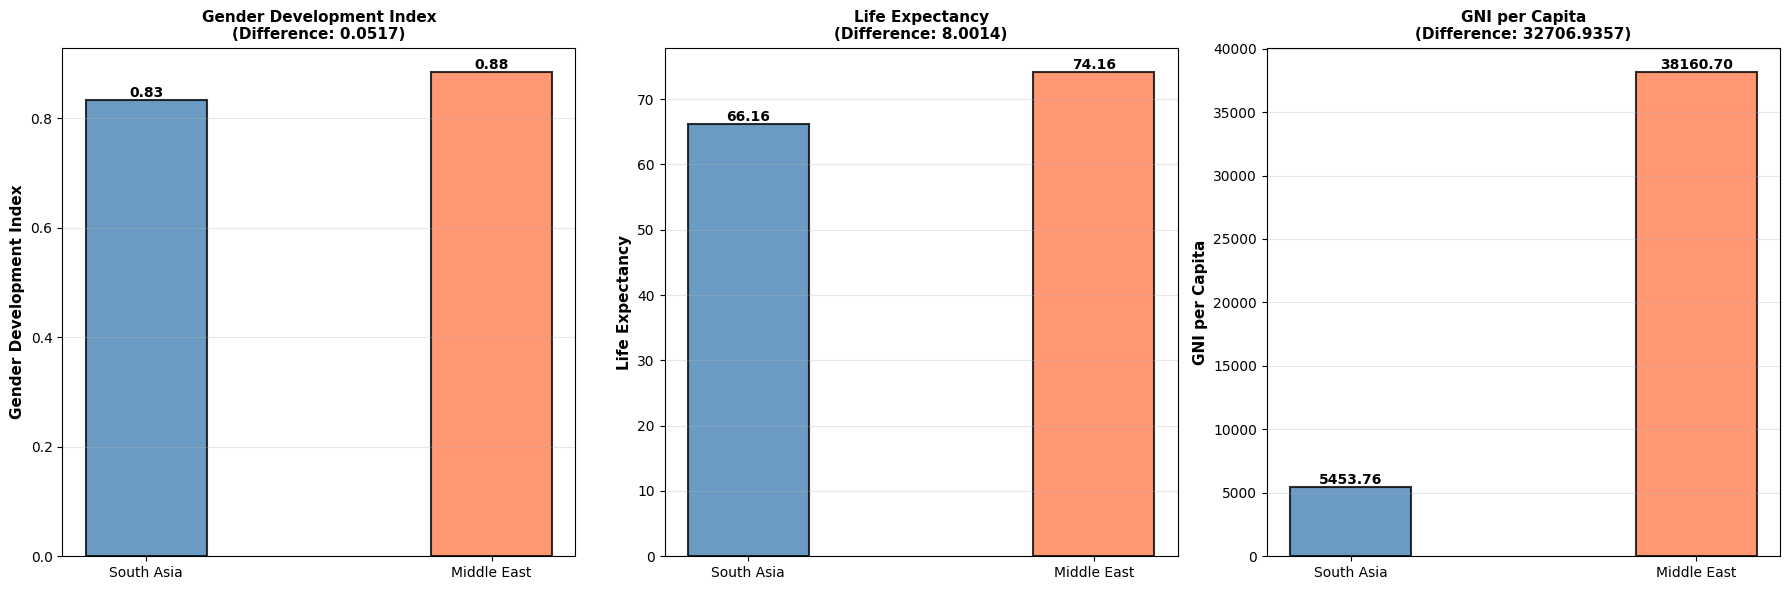

In [ ]:
# Metric Comparisons Across Regions

# Calculate mean values for each metric in both regions
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']
metric_labels = ['Gender Development Index', 'Life Expectancy', 'GNI per Capita']

south_asia_means = [south_asia_df[metric].mean() for metric in metrics]
middle_east_means = [middle_east_df[metric].mean() for metric in metrics]

# Calculate disparities (absolute difference)
disparities = [abs(me - sa) for me, sa in zip(middle_east_means, south_asia_means)]

# Display results
print("="*70)
print("METRIC COMPARISON: SOUTH ASIA vs MIDDLE EAST")
print("="*70)

for i, label in enumerate(metric_labels):
    print(f"\n{label}:")
    print(f"  South Asia Mean: {south_asia_means[i]:.4f}")
    print(f"  Middle East Mean: {middle_east_means[i]:.4f}")
    print(f"  Absolute Difference: {disparities[i]:.4f}")

# Identify greatest disparity
max_disparity_idx = disparities.index(max(disparities))
print("\n" + "="*70)
print(f"GREATEST DISPARITY: {metric_labels[max_disparity_idx]}")
print(f"Difference: {disparities[max_disparity_idx]:.4f}")
print("="*70)

# Create grouped bar chart
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

x = np.arange(2)
width = 0.35

for i, (metric, label) in enumerate(zip(metrics, metric_labels)):
    values = [south_asia_means[i], middle_east_means[i]]

    axes[i].bar(x, values, width,
                color=['steelblue', 'coral'],
                alpha=0.8,
                edgecolor='black',
                linewidth=1.5)

    axes[i].set_ylabel(label, fontsize=11, fontweight='bold')
    axes[i].set_title(f'{label}\n(Difference: {disparities[i]:.4f})',
                      fontsize=11, fontweight='bold')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(['South Asia', 'Middle East'], fontsize=10)
    axes[i].grid(True, alpha=0.3, axis='y')

    # Add value labels on bars
    for j, v in enumerate(values):
        axes[i].text(j, v, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

HDI DISPARITY ANALYSIS

SOUTH ASIA:
  Max HDI: 0.7830
  Min HDI: 0.2840
  Range: 0.4990
  Mean: 0.5516
  Standard Deviation: 0.1198
  Coefficient of Variation (CV): 0.2171

MIDDLE EAST:
  Max HDI: 0.9370
  Min HDI: 0.3570
  Range: 0.5800
  Mean: 0.7391
  Standard Deviation: 0.1295
  Coefficient of Variation (CV): 0.1752

VARIATION COMPARISON:

South Asia exhibits MORE variation in HDI
  South Asia CV: 0.2171
  Middle East CV: 0.1752
  Difference: 0.0419


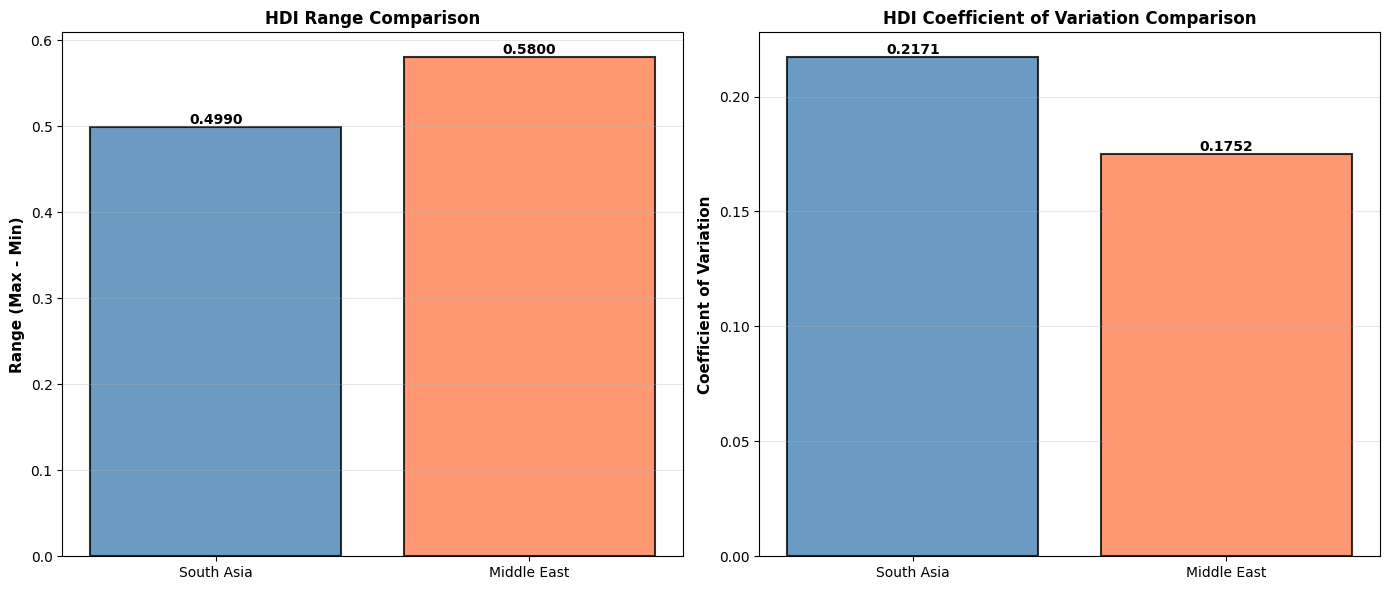

In [ ]:
# HDI Disparity Analysis

# South Asia
sa_max = south_asia_df['hdi'].max()
sa_min = south_asia_df['hdi'].min()
sa_range = sa_max - sa_min
sa_mean = south_asia_df['hdi'].mean()
sa_std = south_asia_df['hdi'].std()
sa_cv = sa_std / sa_mean

# Middle East
me_max = middle_east_df['hdi'].max()
me_min = middle_east_df['hdi'].min()
me_range = me_max - me_min
me_mean = middle_east_df['hdi'].mean()
me_std = middle_east_df['hdi'].std()
me_cv = me_std / me_mean

# Display results
print("="*70)
print("HDI DISPARITY ANALYSIS")
print("="*70)

print("\nSOUTH ASIA:")
print(f"  Max HDI: {sa_max:.4f}")
print(f"  Min HDI: {sa_min:.4f}")
print(f"  Range: {sa_range:.4f}")
print(f"  Mean: {sa_mean:.4f}")
print(f"  Standard Deviation: {sa_std:.4f}")
print(f"  Coefficient of Variation (CV): {sa_cv:.4f}")

print("\nMIDDLE EAST:")
print(f"  Max HDI: {me_max:.4f}")
print(f"  Min HDI: {me_min:.4f}")
print(f"  Range: {me_range:.4f}")
print(f"  Mean: {me_mean:.4f}")
print(f"  Standard Deviation: {me_std:.4f}")
print(f"  Coefficient of Variation (CV): {me_cv:.4f}")

print("\n" + "="*70)
print("VARIATION COMPARISON:")
print("="*70)

if me_cv > sa_cv:
    print(f"\nMiddle East exhibits MORE variation in HDI")
    print(f"  Middle East CV: {me_cv:.4f}")
    print(f"  South Asia CV: {sa_cv:.4f}")
    print(f"  Difference: {me_cv - sa_cv:.4f}")
else:
    print(f"\nSouth Asia exhibits MORE variation in HDI")
    print(f"  South Asia CV: {sa_cv:.4f}")
    print(f"  Middle East CV: {me_cv:.4f}")
    print(f"  Difference: {sa_cv - me_cv:.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Range comparison
regions = ['South Asia', 'Middle East']
ranges = [sa_range, me_range]
axes[0].bar(regions, ranges, color=['steelblue', 'coral'], alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Range (Max - Min)', fontsize=11, fontweight='bold')
axes[0].set_title('HDI Range Comparison', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(ranges):
    axes[0].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# CV comparison
cvs = [sa_cv, me_cv]
axes[1].bar(regions, cvs, color=['steelblue', 'coral'], alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Coefficient of Variation', fontsize=11, fontweight='bold')
axes[1].set_title('HDI Coefficient of Variation Comparison', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(cvs):
    axes[1].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

CORRELATION ANALYSIS: HDI vs METRICS

SOUTH ASIA:
  HDI vs Gender Development Index: 0.8656
  HDI vs Life Expectancy: 0.9588

MIDDLE EAST:
  HDI vs Gender Development Index: 0.9311
  HDI vs Life Expectancy: 0.9430


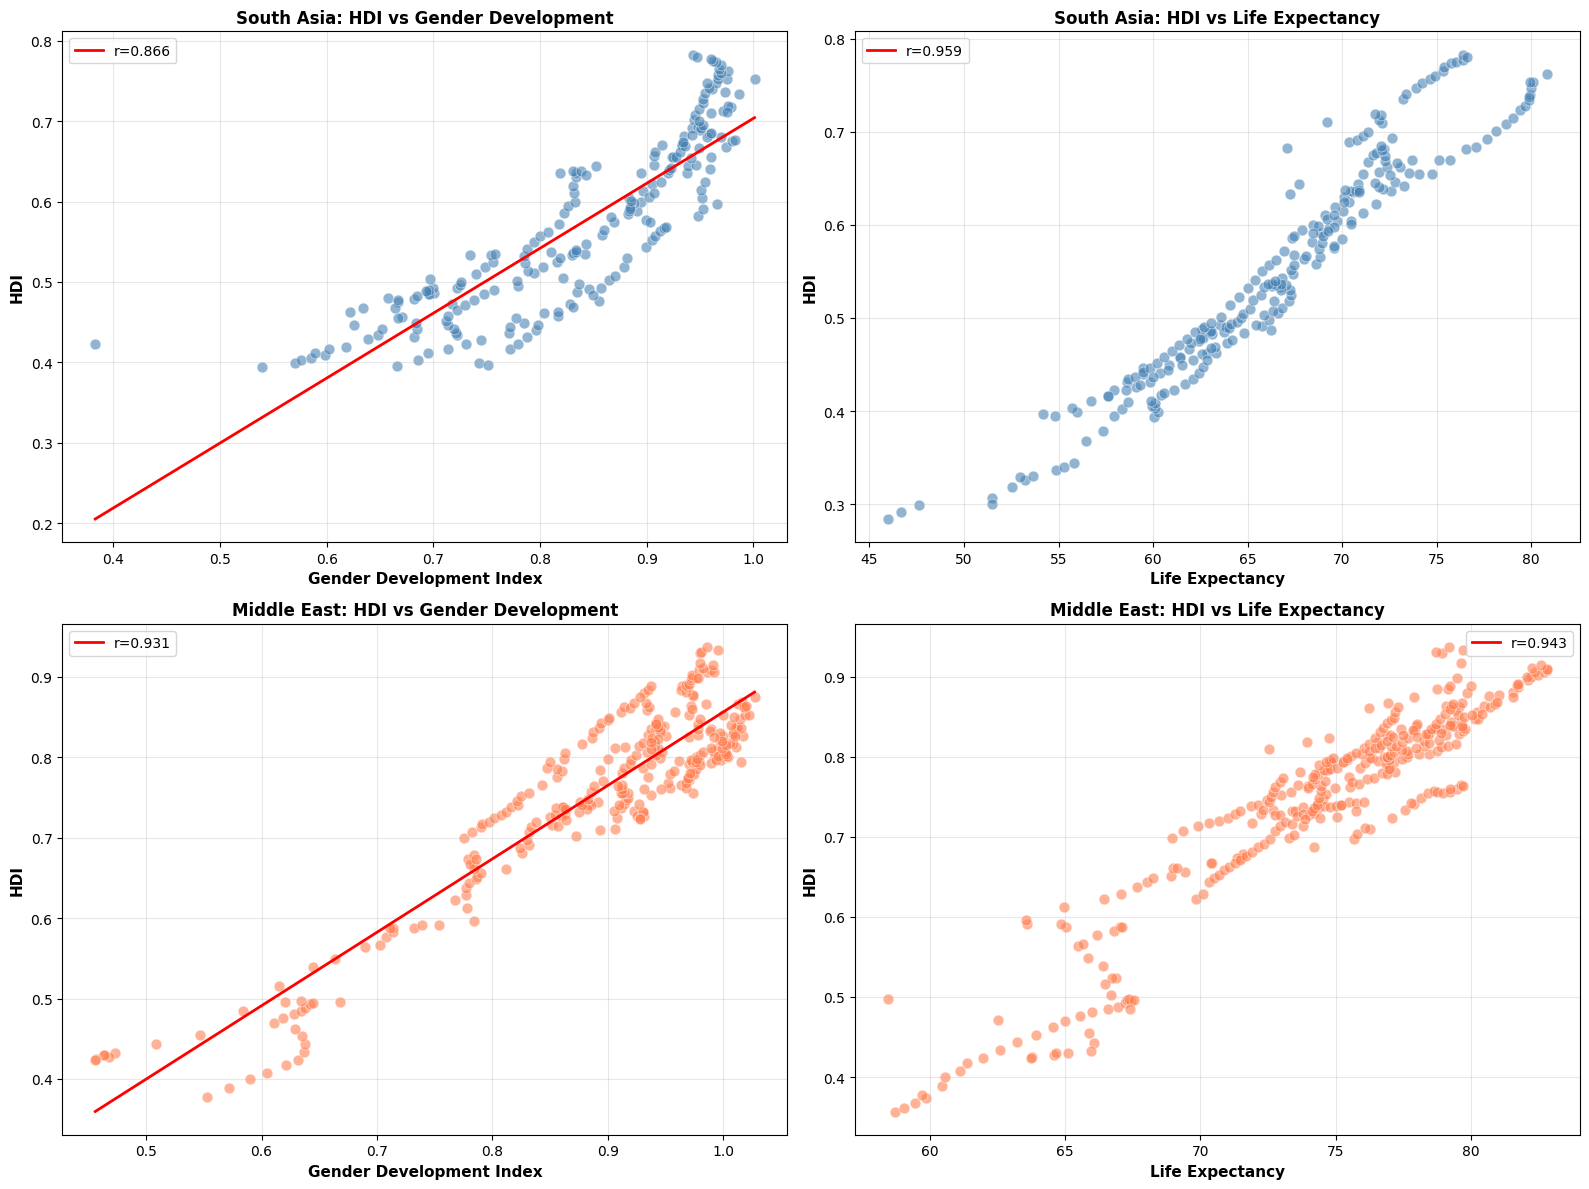


INTERPRETATION:

South Asia - Gender Development:
  Correlation: 0.8656 (strong positive)

South Asia - Life Expectancy:
  Correlation: 0.9588 (strong positive)

Middle East - Gender Development:
  Correlation: 0.9311 (strong positive)

Middle East - Life Expectancy:
  Correlation: 0.9430 (strong positive)


In [ ]:
# Correlation Analysis for Each Region

# South Asia correlations
sa_corr_gdi = south_asia_df['hdi'].corr(south_asia_df['gender_development'])
sa_corr_life = south_asia_df['hdi'].corr(south_asia_df['life_expectancy'])

# Middle East correlations
me_corr_gdi = middle_east_df['hdi'].corr(middle_east_df['gender_development'])
me_corr_life = middle_east_df['hdi'].corr(middle_east_df['life_expectancy'])

# Display correlation results
print("="*70)
print("CORRELATION ANALYSIS: HDI vs METRICS")
print("="*70)

print("\nSOUTH ASIA:")
print(f"  HDI vs Gender Development Index: {sa_corr_gdi:.4f}")
print(f"  HDI vs Life Expectancy: {sa_corr_life:.4f}")

print("\nMIDDLE EAST:")
print(f"  HDI vs Gender Development Index: {me_corr_gdi:.4f}")
print(f"  HDI vs Life Expectancy: {me_corr_life:.4f}")

# Create scatter plots with trendlines
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# South Asia - Gender Development
axes[0, 0].scatter(south_asia_df['gender_development'], south_asia_df['hdi'],
                   alpha=0.6, s=60, color='steelblue', edgecolors='white', linewidth=0.5)
z1 = np.polyfit(south_asia_df['gender_development'].dropna(),
                south_asia_df['hdi'][south_asia_df['gender_development'].notna()], 1)
p1 = np.poly1d(z1)
x1 = np.linspace(south_asia_df['gender_development'].min(),
                 south_asia_df['gender_development'].max(), 100)
axes[0, 0].plot(x1, p1(x1), "r-", linewidth=2, label=f'r={sa_corr_gdi:.3f}')
axes[0, 0].set_xlabel('Gender Development Index', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('HDI', fontsize=11, fontweight='bold')
axes[0, 0].set_title('South Asia: HDI vs Gender Development', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# South Asia - Life Expectancy
axes[0, 1].scatter(south_asia_df['life_expectancy'], south_asia_df['hdi'],
                   alpha=0.6, s=60, color='steelblue', edgecolors='white', linewidth=0.5)
z2 = np.polyfit(south_asia_df['life_expectancy'].dropna(),
                south_asia_df['hdi'][south_asia_df['life_expectancy'].notna()], 1)
p2 = np.poly1d(z2)
x2 = np.linspace(south_asia_df['life_expectancy'].min(),
                 south_asia_df['life_expectancy'].max(), 100)
axes[0, 1].plot(x2, p2(x2), "r-", linewidth=2, label=f'r={sa_corr_life:.3f}')
axes[0, 1].set_xlabel('Life Expectancy', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('HDI', fontsize=11, fontweight='bold')
axes[0, 1].set_title('South Asia: HDI vs Life Expectancy', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Middle East - Gender Development
axes[1, 0].scatter(middle_east_df['gender_development'], middle_east_df['hdi'],
                   alpha=0.6, s=60, color='coral', edgecolors='white', linewidth=0.5)
z3 = np.polyfit(middle_east_df['gender_development'].dropna(),
                middle_east_df['hdi'][middle_east_df['gender_development'].notna()], 1)
p3 = np.poly1d(z3)
x3 = np.linspace(middle_east_df['gender_development'].min(),
                 middle_east_df['gender_development'].max(), 100)
axes[1, 0].plot(x3, p3(x3), "r-", linewidth=2, label=f'r={me_corr_gdi:.3f}')
axes[1, 0].set_xlabel('Gender Development Index', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('HDI', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Middle East: HDI vs Gender Development', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Middle East - Life Expectancy
axes[1, 1].scatter(middle_east_df['life_expectancy'], middle_east_df['hdi'],
                   alpha=0.6, s=60, color='coral', edgecolors='white', linewidth=0.5)
z4 = np.polyfit(middle_east_df['life_expectancy'].dropna(),
                middle_east_df['hdi'][middle_east_df['life_expectancy'].notna()], 1)
p4 = np.poly1d(z4)
x4 = np.linspace(middle_east_df['life_expectancy'].min(),
                 middle_east_df['life_expectancy'].max(), 100)
axes[1, 1].plot(x4, p4(x4), "r-", linewidth=2, label=f'r={me_corr_life:.3f}')
axes[1, 1].set_xlabel('Life Expectancy', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('HDI', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Middle East: HDI vs Life Expectancy', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Interpretation
print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)

def interpret_correlation(r, metric, region):
    if abs(r) >= 0.7:
        strength = "strong"
    elif abs(r) >= 0.4:
        strength = "moderate"
    else:
        strength = "weak"

    direction = "positive" if r > 0 else "negative"

    print(f"\n{region} - {metric}:")
    print(f"  Correlation: {r:.4f} ({strength} {direction})")

interpret_correlation(sa_corr_gdi, "Gender Development", "South Asia")
interpret_correlation(sa_corr_life, "Life Expectancy", "South Asia")
interpret_correlation(me_corr_gdi, "Gender Development", "Middle East")
interpret_correlation(me_corr_life, "Life Expectancy", "Middle East")

OUTLIER DETECTION (1.5 × IQR RULE)

SOUTH ASIA:
  HDI - Q1: 0.4595, Q3: 0.6455, IQR: 0.1860
  HDI - Lower Bound: 0.1805, Upper Bound: 0.9245
  GNI - Q1: 2341.9582, Q3: 6759.6293, IQR: 4417.6711
  GNI - Lower Bound: -4284.5485, Upper Bound: 13386.1359
  Number of outliers: 19

  Outlier countries:
        country    hdi  gross_inc_percap
3511   Maldives  0.655       14543.14634
5473  Sri Lanka  0.774       13405.80369

MIDDLE EAST:
  HDI - Q1: 0.7022, Q3: 0.8270, IQR: 0.1248
  HDI - Lower Bound: 0.5151, Upper Bound: 1.0141
  GNI - Q1: 10342.8517, Q3: 56463.4232, IQR: 46120.5715
  GNI - Lower Bound: -58838.0056, Upper Bound: 125644.2805
  Number of outliers: 36

  Outlier countries:
     country    hdi  gross_inc_percap
2640    Iraq  0.497       7153.107833
6336   Yemen  0.357       2390.861687


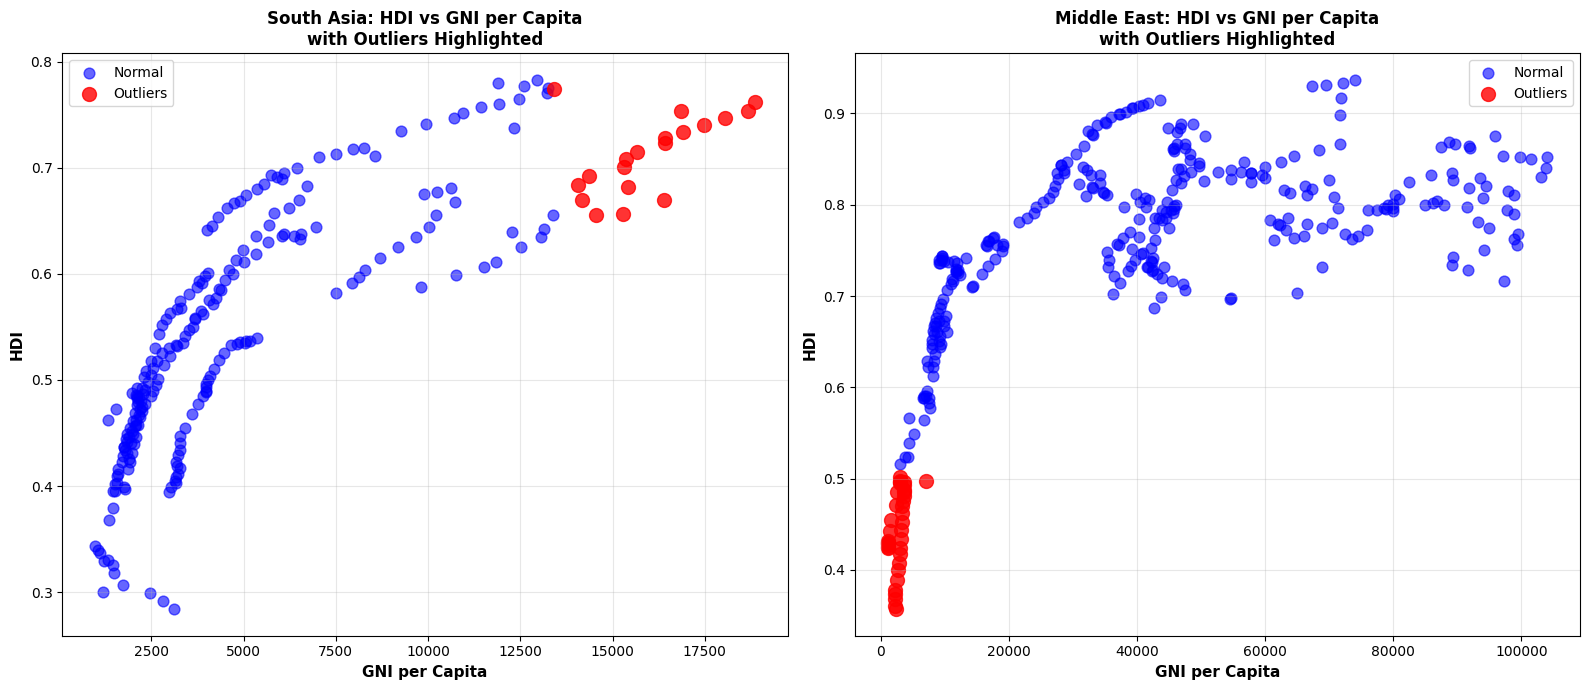


SIGNIFICANCE OF OUTLIERS:

Outliers in these regions may indicate:

1. Economic Wealth vs Human Development Mismatch:
   - High GNI but lower HDI: Resource-rich nations with inequality
   - High HDI but lower GNI: Countries with strong social policies

2. Regional Context:
   - South Asia: May show outliers due to rapid economic growth
   - Middle East: May show outliers due to oil wealth concentration

3. Data Quality:
   - Political instability affecting measurements
   - Small population countries with extreme values


In [ ]:
# Outlier Detection for Each Region using 1.5 × IQR rule

# Function to detect outliers
def detect_outliers_region(df, region_name):
    # HDI outliers
    Q1_hdi = df['hdi'].quantile(0.25)
    Q3_hdi = df['hdi'].quantile(0.75)
    IQR_hdi = Q3_hdi - Q1_hdi
    lower_hdi = Q1_hdi - 1.5 * IQR_hdi
    upper_hdi = Q3_hdi + 1.5 * IQR_hdi

    # GNI outliers
    Q1_gni = df['gross_inc_percap'].quantile(0.25)
    Q3_gni = df['gross_inc_percap'].quantile(0.75)
    IQR_gni = Q3_gni - Q1_gni
    lower_gni = Q1_gni - 1.5 * IQR_gni
    upper_gni = Q3_gni + 1.5 * IQR_gni

    # Mark outliers
    df['is_outlier'] = ((df['hdi'] < lower_hdi) | (df['hdi'] > upper_hdi) |
                         (df['gross_inc_percap'] < lower_gni) | (df['gross_inc_percap'] > upper_gni))

    outliers = df[df['is_outlier']]

    print(f"\n{region_name}:")
    print(f"  HDI - Q1: {Q1_hdi:.4f}, Q3: {Q3_hdi:.4f}, IQR: {IQR_hdi:.4f}")
    print(f"  HDI - Lower Bound: {lower_hdi:.4f}, Upper Bound: {upper_hdi:.4f}")
    print(f"  GNI - Q1: {Q1_gni:.4f}, Q3: {Q3_gni:.4f}, IQR: {IQR_gni:.4f}")
    print(f"  GNI - Lower Bound: {lower_gni:.4f}, Upper Bound: {upper_gni:.4f}")
    print(f"  Number of outliers: {len(outliers)}")

    if len(outliers) > 0:
        print(f"\n  Outlier countries:")
        print(outliers[['country', 'hdi', 'gross_inc_percap']].drop_duplicates('country'))

    return df

# Detect outliers for both regions
print("="*70)
print("OUTLIER DETECTION (1.5 × IQR RULE)")
print("="*70)

south_asia_df = detect_outliers_region(south_asia_df.copy(), "SOUTH ASIA")
middle_east_df = detect_outliers_region(middle_east_df.copy(), "MIDDLE EAST")

# Create scatter plots
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# South Asia scatter plot
sa_normal = south_asia_df[~south_asia_df['is_outlier']]
sa_outliers = south_asia_df[south_asia_df['is_outlier']]

axes[0].scatter(sa_normal['gross_inc_percap'], sa_normal['hdi'],
               alpha=0.6, s=60, color='blue', label='Normal')
axes[0].scatter(sa_outliers['gross_inc_percap'], sa_outliers['hdi'],
               alpha=0.8, s=100, color='red', label='Outliers')
axes[0].set_xlabel('GNI per Capita', fontsize=11, fontweight='bold')
axes[0].set_ylabel('HDI', fontsize=11, fontweight='bold')
axes[0].set_title('South Asia: HDI vs GNI per Capita\nwith Outliers Highlighted',
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Middle East scatter plot
me_normal = middle_east_df[~middle_east_df['is_outlier']]
me_outliers = middle_east_df[middle_east_df['is_outlier']]

axes[1].scatter(me_normal['gross_inc_percap'], me_normal['hdi'],
               alpha=0.6, s=60, color='blue', label='Normal')
axes[1].scatter(me_outliers['gross_inc_percap'], me_outliers['hdi'],
               alpha=0.8, s=100, color='red', label='Outliers')
axes[1].set_xlabel('GNI per Capita', fontsize=11, fontweight='bold')
axes[1].set_ylabel('HDI', fontsize=11, fontweight='bold')
axes[1].set_title('Middle East: HDI vs GNI per Capita\nwith Outliers Highlighted',
                  fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Discussion
print("\n" + "="*70)
print("SIGNIFICANCE OF OUTLIERS:")
print("="*70)
print("\nOutliers in these regions may indicate:")
print("\n1. Economic Wealth vs Human Development Mismatch:")
print("   - High GNI but lower HDI: Resource-rich nations with inequality")
print("   - High HDI but lower GNI: Countries with strong social policies")
print("\n2. Regional Context:")
print("   - South Asia: May show outliers due to rapid economic growth")
print("   - Middle East: May show outliers due to oil wealth concentration")
print("\n3. Data Quality:")
print("   - Political instability affecting measurements")
print("   - Small population countries with extreme values")